Anush Tadevosyan  
08/04/2023  
"Exploring Crime in United States"  

# Introduction

In this project, we will answer various question about crimes in US states for a wide range of years

Link to Dataset: https://corgis-edu.github.io/corgis/csv/state_crime/  
Link to Forum "Crime in DC": https://www.reddit.com/r/washingtondc/comments/xx6g4e/crime_in_dc/  
Link to Forum "Is New Hampshire safe for minorities?": https://www.reddit.com/r/newhampshire/comments/wafenm/is_new_hampshire_safe_for_minorities/

The reason for choosing this particular dataset is my personal interest in crime stories and documentaries. I am curious to see what can we find and what will be the conclusions that we will land upon after final findings.
The end goal of this project is to find the safest state and the most dangerous state in terms of crimes in United States (according to dataset) and to predict how the rate of crimes will change in those states in future!

# Methods

**Data Presentation & Exploration** 
**Basic Information about the dataset**: The dataset classifies crimes into two groups: property & violent crimes. Property crime refers to burglary, larceny, and motor related crime while violent crime refers to assault, murder, rape, and robbery. These reports range from the year 1960 to 2019. With this in mind, let's understand and explore our data.



In [1]:
!pip install pmdarima

The dataset has 21 columns and 3115 rows. As mentioned, the dataset covers the crimes in states from the year 1960 to 2019 and we can see that half of data is for years 1990-2019

In [22]:
import pandas as pd
import pmdarima as pm
from pmdarima import auto_arima
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import math
import nltk
from nltk.tokenize import word_tokenize
from nltk.sentiment import vader
from nltk.corpus import stopwords
from nltk.corpus import opinion_lexicon
from nltk.stem.porter import PorterStemmer

nltk.download('stopwords')
crime_data = pd.read_csv('/home/jovyan/DH140-Final-Project/state_crime.csv')


[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [26]:
#total data summary
crime_data.describe()

Year  Data.Population  Data.Rates.Property.All  \
count  3115.000000     3.115000e+03              3115.000000   
mean   1989.544141     9.708502e+06              3542.202311   
std      17.299570     3.506750e+07              1418.191397   
min    1960.000000     2.261670e+05               573.100000   
25%    1975.000000     1.279156e+06              2472.650000   
50%    1990.000000     3.358000e+06              3438.400000   
75%    2005.000000     6.082836e+06              4439.100000   
max    2019.000000     3.282395e+08              9512.100000   

       Data.Rates.Property.Burglary  Data.Rates.Property.Larceny  \
count                   3115.000000                  3115.000000   
mean                     876.532520                  2322.659133   
std                      446.531611                   897.934463   
min                      126.300000                   293.300000   
25%                      535.000000                  1663.800000   
50%                      796.600000                  2275.700000   
75%                     1133.850000                  2877.500000   
max                     2906.700000                  5833.800000   

       Data.Rates.Property.Motor  Data.Rates.Violent.All  \
count                3115.000000             3115.000000   
mean                  343.011300              397.877047   
std                   221.654068              287.498896   
min                    28.400000                9.500000   
25%                   185.600000              217.200000   
50%                   288.900000              342.200000   
75%                   437.200000              518.250000   
max                  1839.900000             2921.800000   

       Data.Rates.Violent.Assault  Data.Rates.Violent.Murder  \
count                 3115.000000                3115.000000   
mean                   237.365040                   6.477207   
std                    159.336737                   5.886449   
min                      3.600000                   0.200000   
25%                    124.000000                   3.100000   
50%                    205.100000                   5.400000   
75%                    319.350000                   8.400000   
max                   1557.600000                  80.600000   

       Data.Rates.Violent.Rape  Data.Rates.Violent.Robbery  \
count              3115.000000                 3115.000000   
mean                 30.179872                  123.853258   
std                  16.694626                  143.261882   
min                   0.800000                    1.900000   
25%                  18.500000                   42.700000   
50%                  28.800000                   93.800000   
75%                  39.800000                  152.800000   
max                 161.600000                 1635.100000   

       Data.Totals.Property.All  Data.Totals.Property.Burglary  \
count              3.115000e+03                   3.115000e+03   
mean               3.560081e+05                   8.977698e+04   
std                1.321823e+06                   3.376635e+05   
min                3.147000e+03                   7.510000e+02   
25%                3.974500e+04                   9.613500e+03   
50%                1.092840e+05                   2.703800e+04   
75%                2.253325e+05                   5.562000e+04   
max                1.296112e+07                   3.795200e+06   

       Data.Totals.Property.Larceny  Data.Totals.Property.Motor  \
count                  3.115000e+03                3.115000e+03   
mean                   2.275827e+05                3.864856e+04   
std                    8.460659e+05                1.469896e+05   
min                    1.489000e+03                1.780000e+02   
25%                    2.619500e+04                3.227000e+03   
50%                    7.142300e+04                9.468000e+03   
75%                    1.461155e+05                2.124150e+04   
max             

In [24]:
#first major crime group summary: property
crime_data['Data.Totals.Property.All'].describe()

count    3.115000e+03
mean     3.560081e+05
std      1.321823e+06
min      3.147000e+03
25%      3.974500e+04
50%      1.092840e+05
75%      2.253325e+05
max      1.296112e+07
Name: Data.Totals.Property.All, dtype: float64

In [25]:
#second major crime group summary: property
crime_data['Data.Totals.Violent.All'].describe()

count    3.115000e+03
mean     4.594917e+04
std      1.759960e+05
min      3.700000e+01
25%      3.318000e+03
50%      1.154800e+04
75%      2.880400e+04
max      1.932274e+06
Name: Data.Totals.Violent.All, dtype: float64

**Descriptive Statistics**: If we look at the mean number of property and violent crimes over the years, property crimes are more common. The mean rate of property crimes also exceeds that of violent crimes. This is good news to us as we can already tell that the crimes that directly, phsyically affect people are less than other types of crimes historically!

In [6]:
corr_year_property_crime = crime_data['Data.Population'].corr(crime_data['Data.Totals.Property.All'])
corr_year_property_crime


0.9588214769635185

In [7]:
corr_year_violent_crime = crime_data['Data.Population'].corr(crime_data['Data.Totals.Violent.All'])
corr_year_violent_crime

0.9551347420176186

**Correlations**: As we can see from the results, there is a strong correlation in the size of population and number of crimes. This indicates, that generally, as the population of a state increases, the total number of property/violent crimes tends to increase

In [8]:
missing_values_cd = crime_data.isnull()
missing_values_count = missing_values_cd.sum()
print(missing_values_count)

State                            0
Year                             0
Data.Population                  0
Data.Rates.Property.All          0
Data.Rates.Property.Burglary     0
Data.Rates.Property.Larceny      0
Data.Rates.Property.Motor        0
Data.Rates.Violent.All           0
Data.Rates.Violent.Assault       0
Data.Rates.Violent.Murder        0
Data.Rates.Violent.Rape          0
Data.Rates.Violent.Robbery       0
Data.Totals.Property.All         0
Data.Totals.Property.Burglary    0
Data.Totals.Property.Larceny     0
Data.Totals.Property.Motor       0
Data.Totals.Violent.All          0
Data.Totals.Violent.Assault      0
Data.Totals.Violent.Murder       0
Data.Totals.Violent.Rape         0
Data.Totals.Violent.Robbery      0
dtype: int64


**Missing Values**: As we can see that we have no missing values in our dataset by looking at the output of the cell above

In [9]:
label_encoder = LabelEncoder()
crime_data['State_Encoded'] = label_encoder.fit_transform(crime_data['State'])

state_encoding_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))


In [10]:
print(state_encoding_mapping)

{'Alabama': 0, 'Alaska': 1, 'Arizona': 2, 'Arkansas': 3, 'California': 4, 'Colorado': 5, 'Connecticut': 6, 'Delaware': 7, 'District of Columbia': 8, 'Florida': 9, 'Georgia': 10, 'Hawaii': 11, 'Idaho': 12, 'Illinois': 13, 'Indiana': 14, 'Iowa': 15, 'Kansas': 16, 'Kentucky': 17, 'Louisiana': 18, 'Maine': 19, 'Maryland': 20, 'Massachusetts': 21, 'Michigan': 22, 'Minnesota': 23, 'Mississippi': 24, 'Missouri': 25, 'Montana': 26, 'Nebraska': 27, 'Nevada': 28, 'New Hampshire': 29, 'New Jersey': 30, 'New Mexico': 31, 'New York': 32, 'North Carolina': 33, 'North Dakota': 34, 'Ohio': 35, 'Oklahoma': 36, 'Oregon': 37, 'Pennsylvania': 38, 'Rhode Island': 39, 'South Carolina': 40, 'South Dakota': 41, 'Tennessee': 42, 'Texas': 43, 'United States': 44, 'Utah': 45, 'Vermont': 46, 'Virginia': 47, 'Washington': 48, 'West Virginia': 49, 'Wisconsin': 50, 'Wyoming': 51}


**Encoding Categorical Values**: Above, we encoded the variable state, as later, it might be useful when doing time-series analysis, maybe using additional data related to states etc

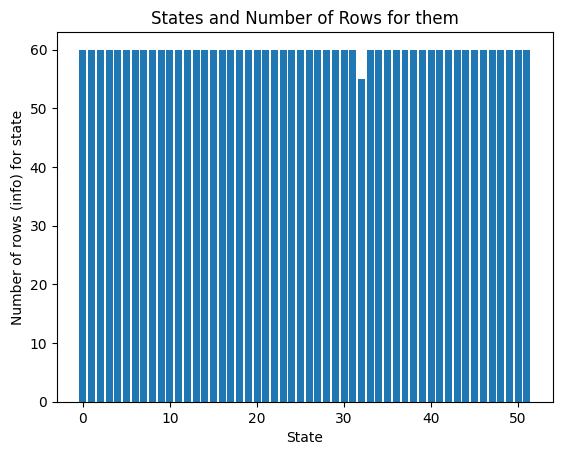

In [11]:
# See how much data per state, can the dataset be skewed? how many rows per state?
number_of_rows_for_state = []
list_of_state_names = []

for key,value in state_encoding_mapping.items():
    list_of_state_names.append(key)
    key_data = crime_data[crime_data['State'] == key]
    number_of_rows_for_state.append(key_data.shape[0])

plt.bar(state_encoding_mapping.values(),number_of_rows_for_state)
plt.xlabel('State')
plt.ylabel('Number of rows (info) for state')
plt.title('States and Number of Rows for them')
plt.show()



As we can see, there are 60 entries per state (besides New York) so we don't have to worry about data being skewed or bias (disproportionally number rows for a state compared to other states). In this analysis we won't consider 5 less entries to be bias for the purposes of this research

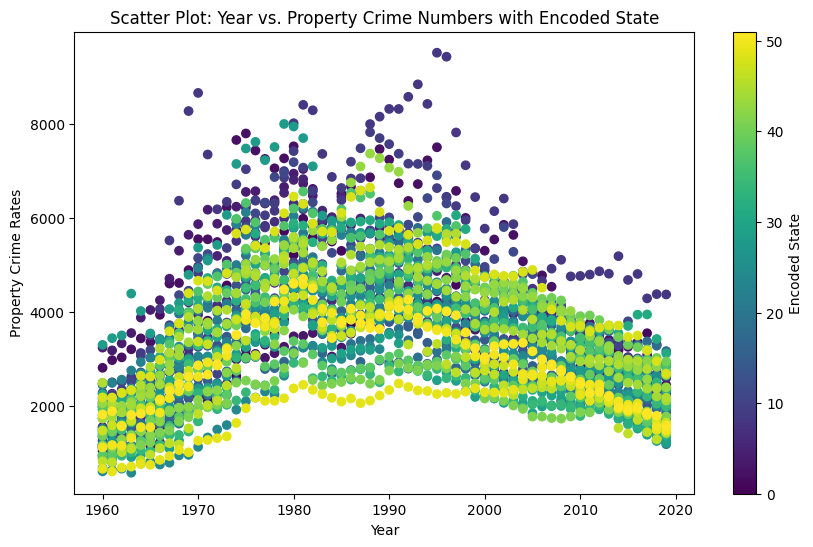

In [12]:
# Scatter plot: Property crimes vs Year vs Encoded States
plt.figure(figsize=(10, 6))
plt.scatter(crime_data['Year'], crime_data['Data.Rates.Property.All'], c=crime_data['State_Encoded'], cmap='viridis')
plt.colorbar(label='Encoded State')
plt.xlabel('Year')
plt.ylabel('Property Crime Rates')
plt.title('Scatter Plot: Year vs. Property Crime Numbers with Encoded State')
plt.show()

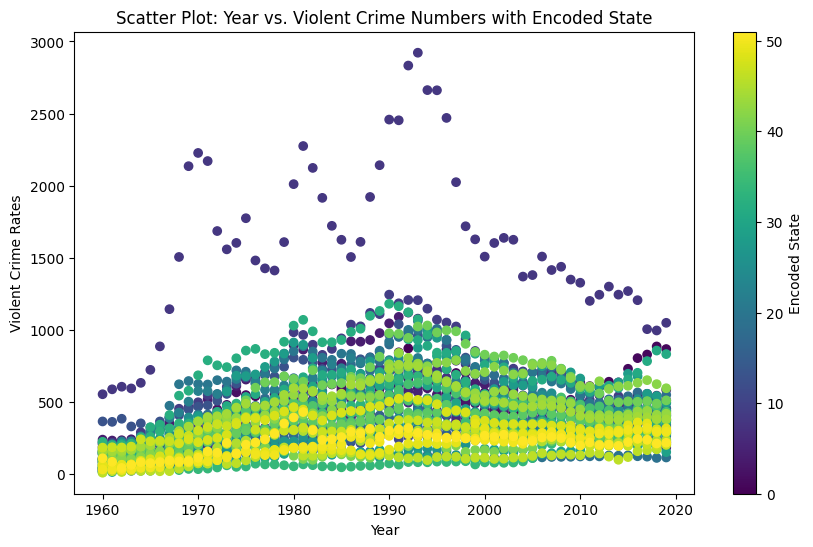

In [13]:
# Scatter plot: Violent crimes vs Year vs Encoded States

plt.figure(figsize=(10, 6))
plt.scatter(crime_data['Year'], crime_data['Data.Rates.Violent.All'], c=crime_data['State_Encoded'], cmap='viridis')
plt.colorbar(label='Encoded State')
plt.xlabel('Year')
plt.ylabel('Violent Crime Rates')
plt.title('Scatter Plot: Year vs. Violent Crime Numbers with Encoded State')
plt.show()

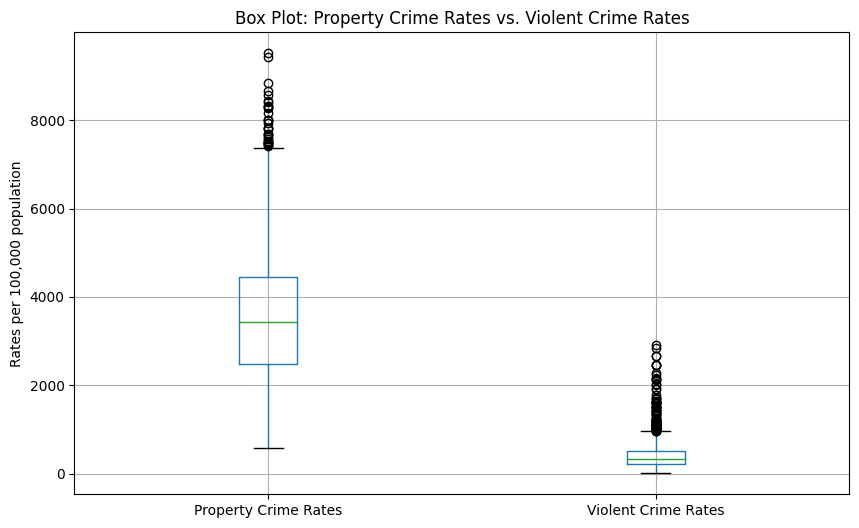

In [14]:
plt.figure(figsize=(10, 6))
crime_data[['Data.Rates.Property.All', 'Data.Rates.Violent.All']].boxplot()
plt.title('Box Plot: Property Crime Rates vs. Violent Crime Rates')
plt.ylabel('Rates per 100,000 population')
plt.xticks([1, 2], ['Property Crime Rates', 'Violent Crime Rates'])
plt.show()

**Data Disrtibution & Outliers**: 
Through scatter plots, call them outliers or states with significant crime, we can see that total rate of violent crimes and total rate of property crimes is significantly larger in one of the state, which is in this group - 'Alabama': 0, 'Alaska': 1, 'Arizona': 2, 'Arkansas': 3, 'California': 4, 'Colorado': 5, 'Connecticut': 6, 'Delaware': 7, 'District of Columbia': 8, 'Florida': 9, 'Georgia': 10, 'Hawaii': 11, 'Idaho': 12, 'Illinois': 13, 'Indiana': 14, 'Iowa': 15, 'Kansas': 16, 'Kentucky': 17, 'Louisiana': 18, 'Maine': 19, 'Maryland': 20
Through analysis later, we will figure out which state exactly that is.

Through box plot, we can see that over the years and over the states, the rate of property crimes is larger than the rate of violent crimes (rates per 100,000 population).We can also see that there is a fair amount of outliers for both of the crime rate, which suggests that there has been years and states, where during those years, that specific state was an "exception" compared to others and had a higher crime rate. Note that the outliers for violent crime rates are more tightly stacked together, suggesting that the rate of violent crimes faced way more exceptions than the rate of property crimes

**Analytical Process**: After having some understanding of our data and exploring it, it is time to dive into the actual analysis. Based on exploration, we figured out an important point about exceptional crime rate in some states and that of states that falls between 0-20 in the Encoded State list, has a significantly higher crime rate. Now, we will analyze the graphs for each of the states and proceed to answer the main questions of this analysis, for which, we will be using "weights" to determine the safety score for each state and afterwards, using ARIMA statistical model, we will predict the future rate of crimes for those states! 

# Results

We will be using code to answer the following questions
1. For each state, analyze the total number of propery crimes and total number of violent crimes throughout the years of 1960-2020
2. For each state, analyze the rate of property crimes and rate of violent crime throughout the years 1960-2019.
3. Based on historical data, which state is the safest state and the most dangerous state? 
4. What will be the rate of total property crimes and total violent crimes in those two states in 2050?
5. Support findings with reddit post analyzations

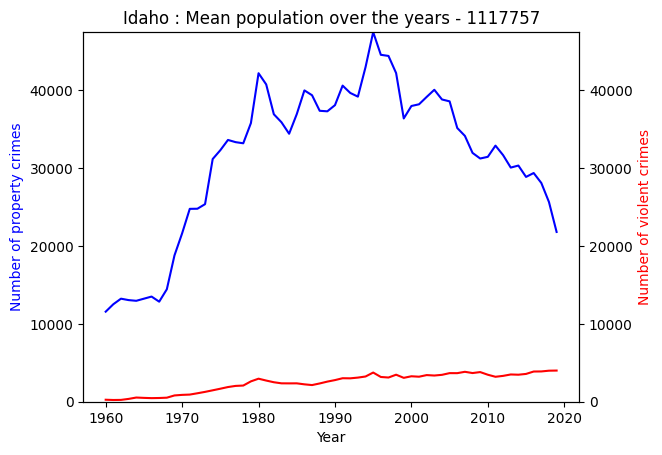

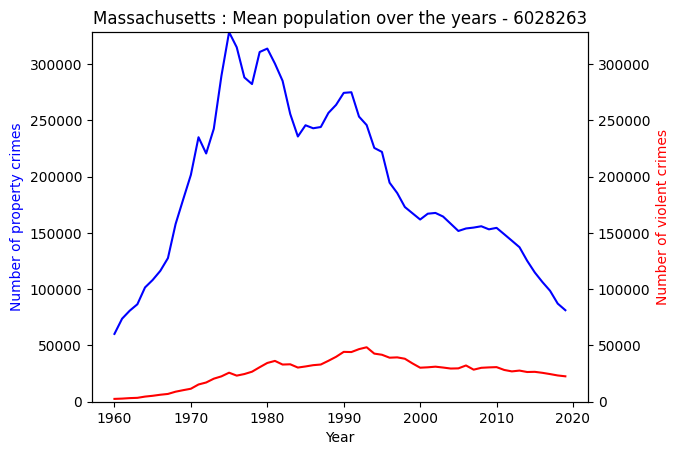

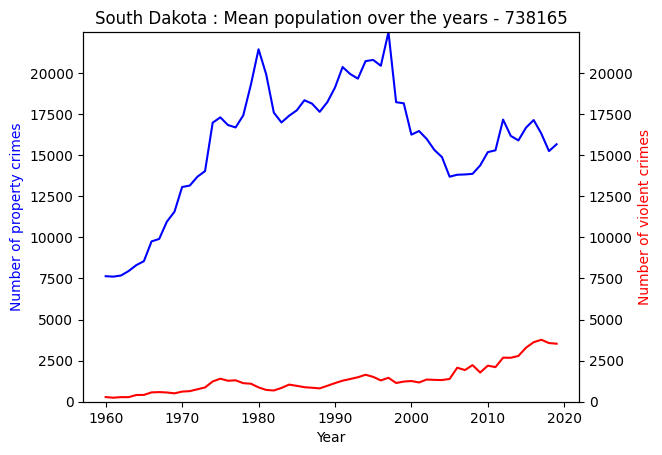

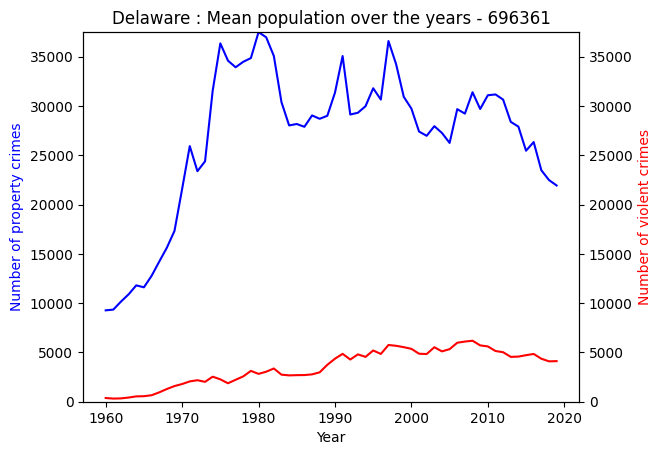

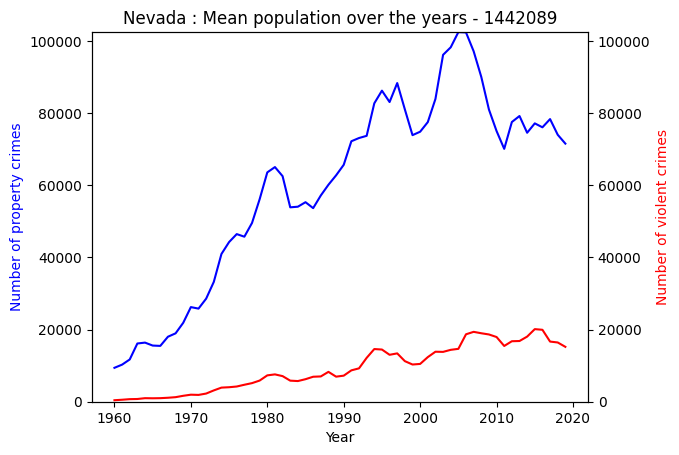

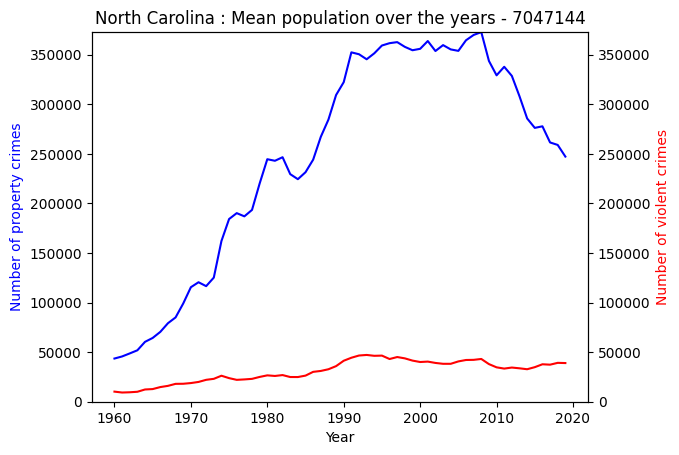

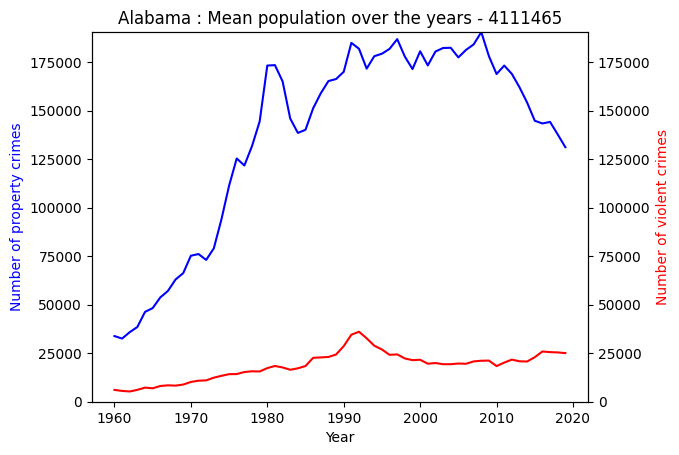

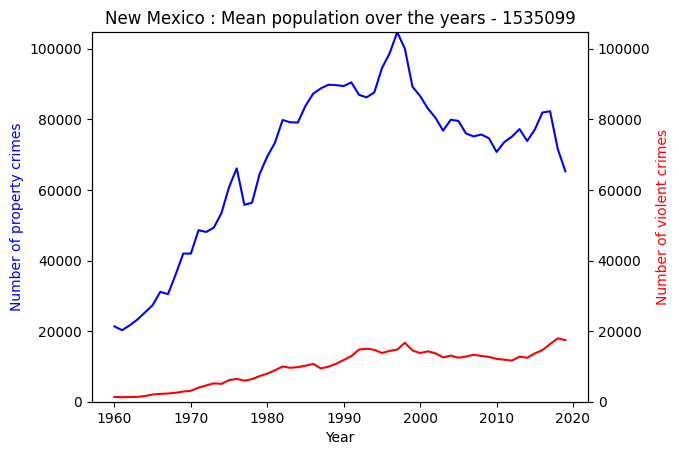

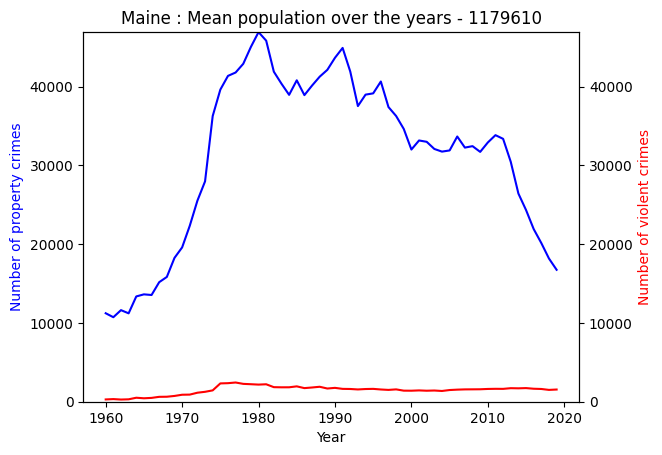

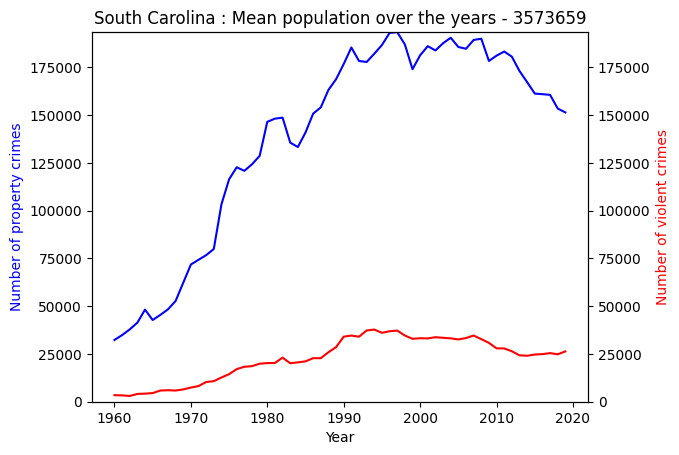

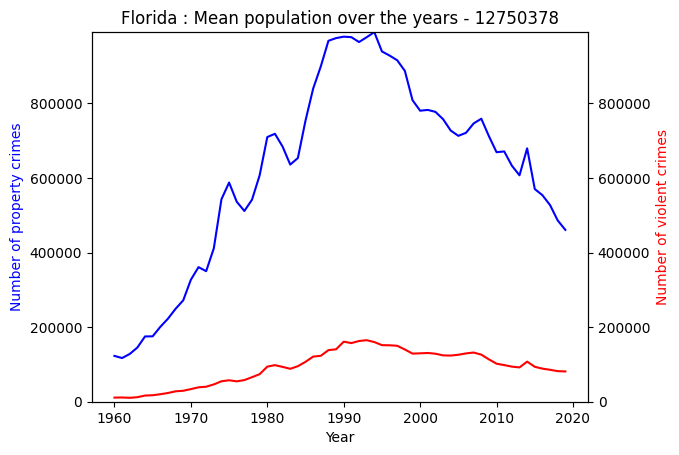

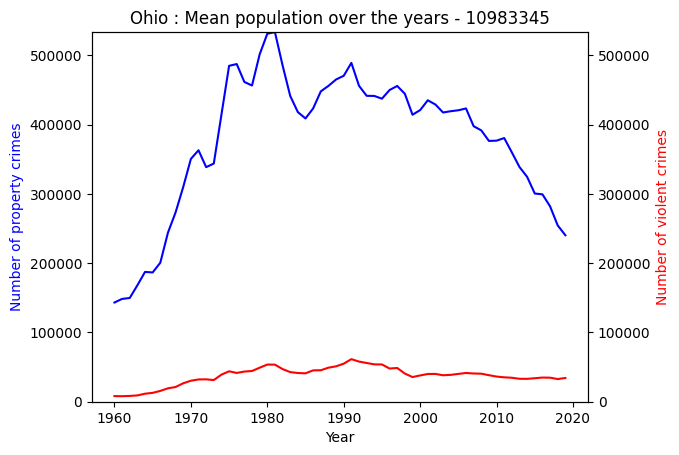

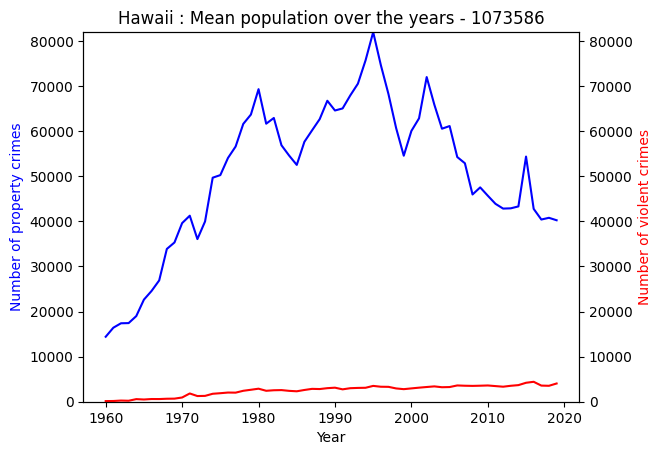

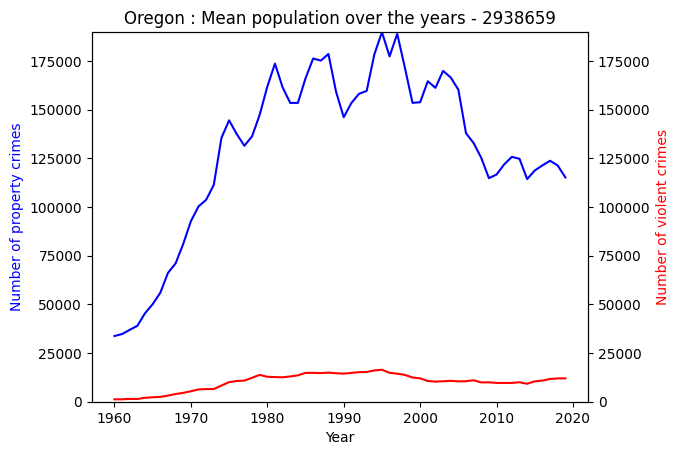

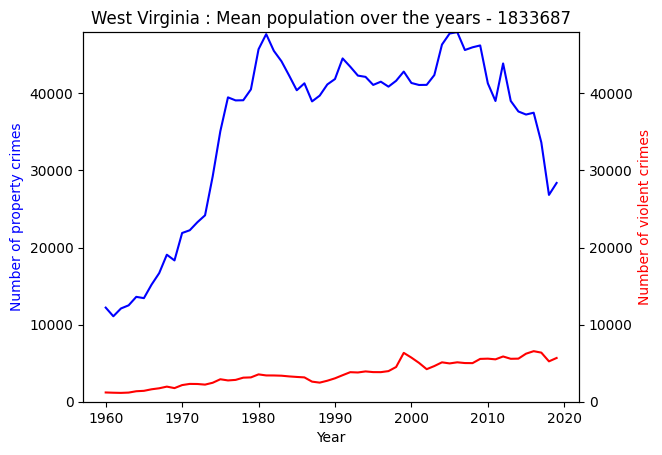

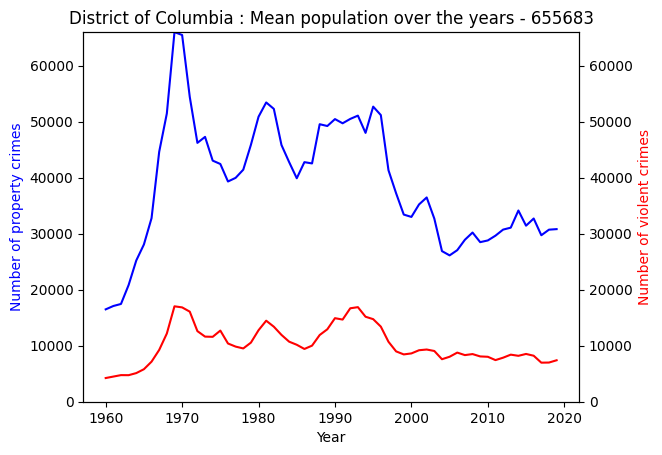

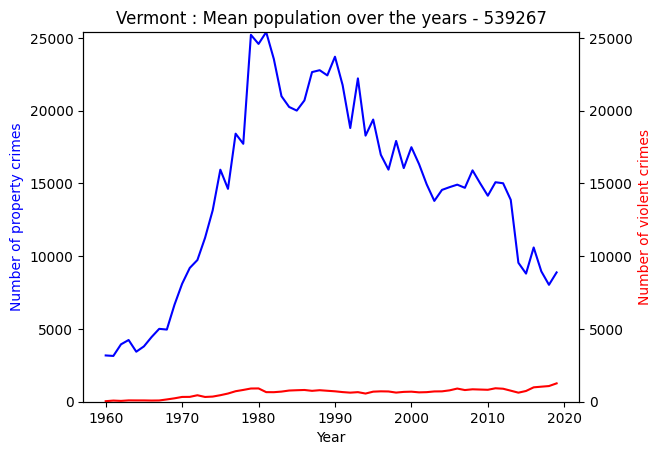

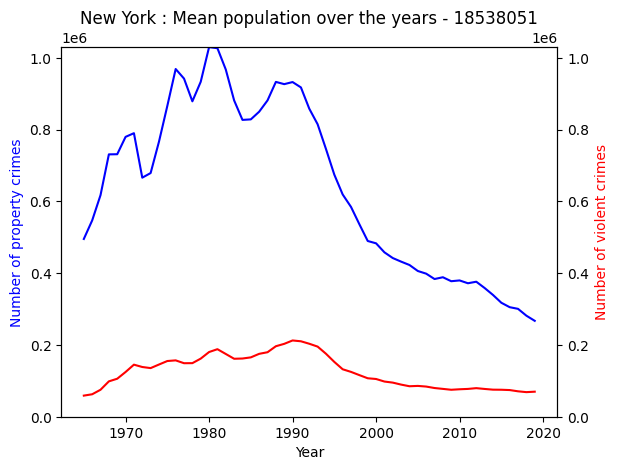

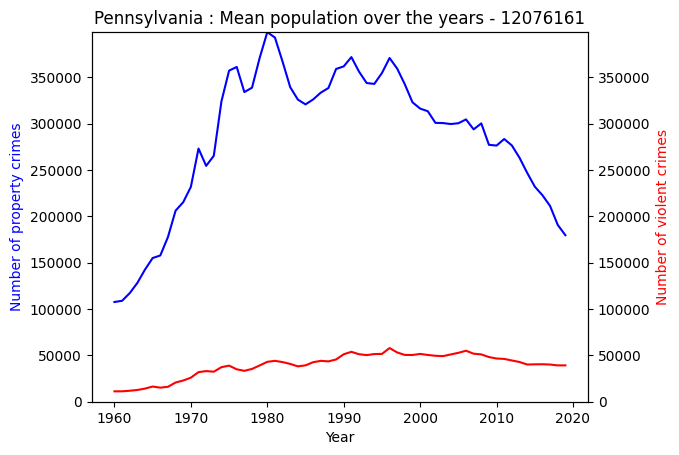

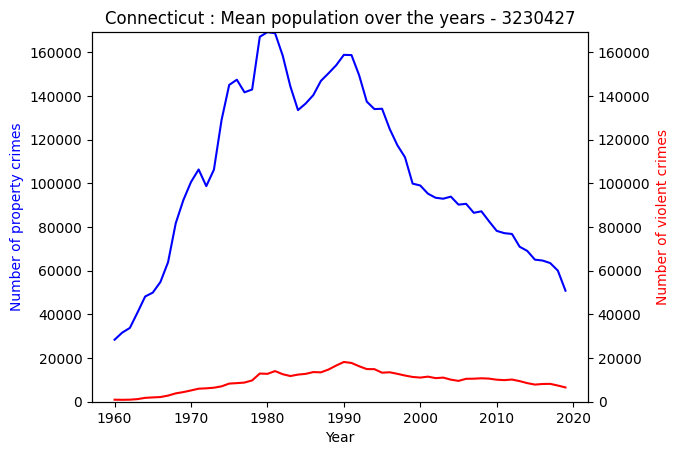

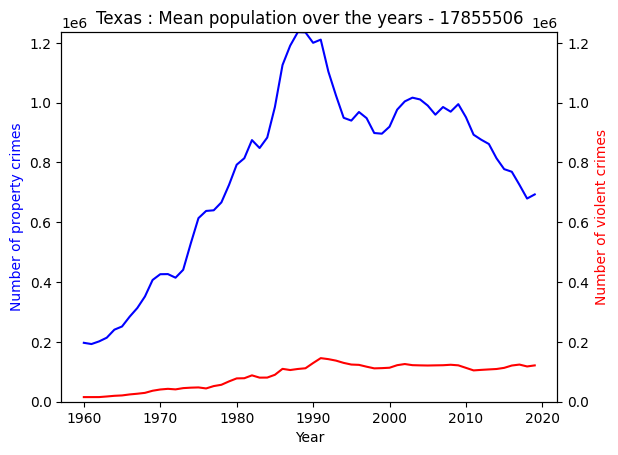

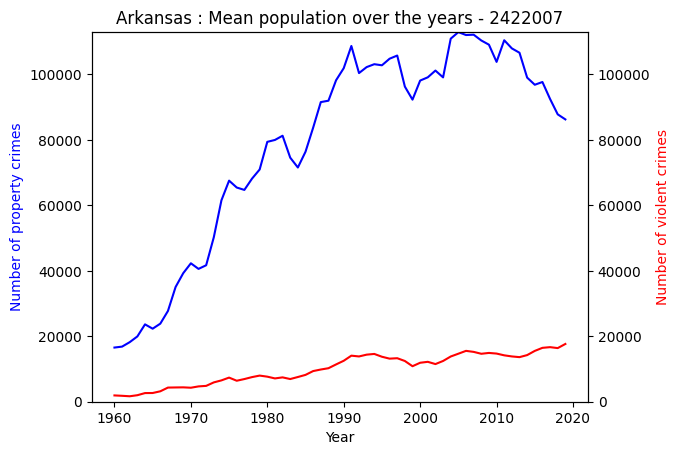

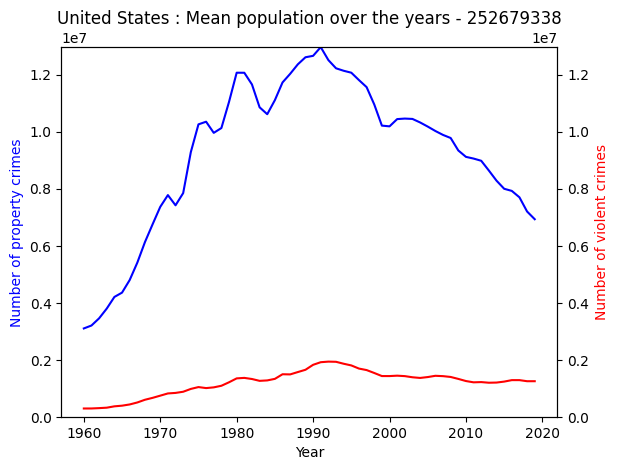

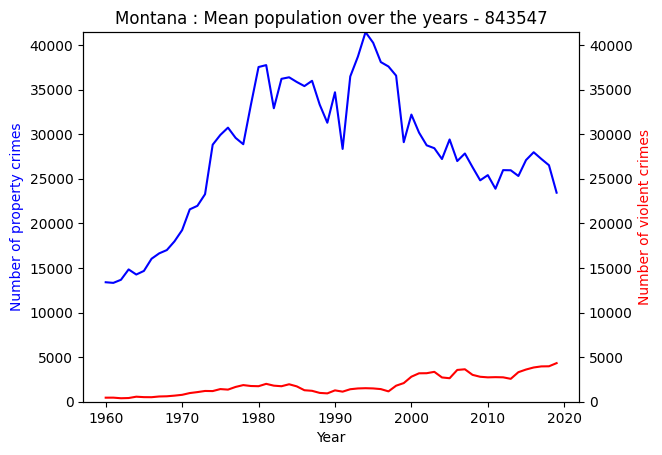

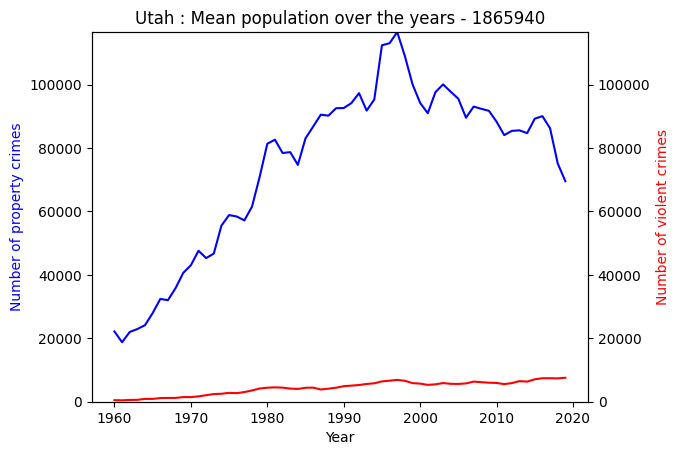

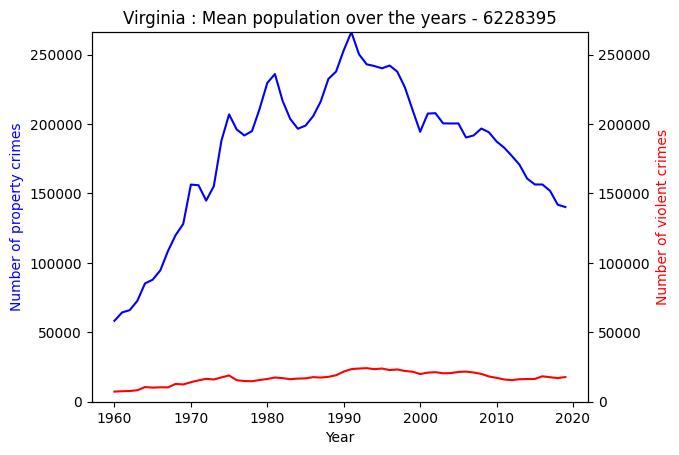

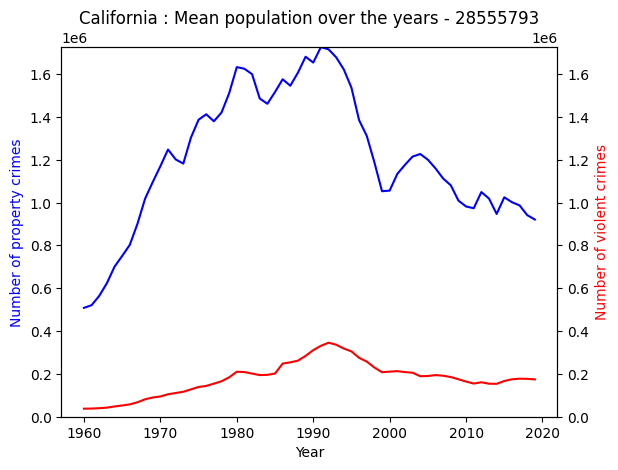

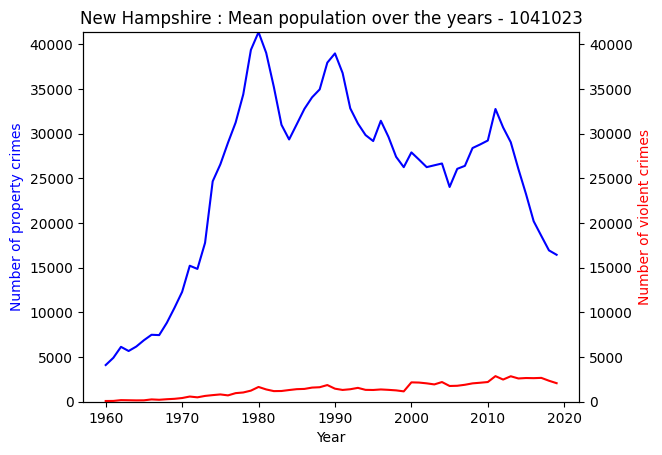

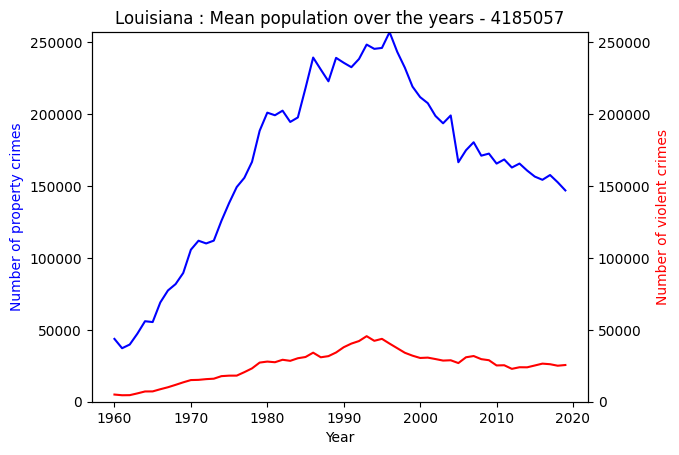

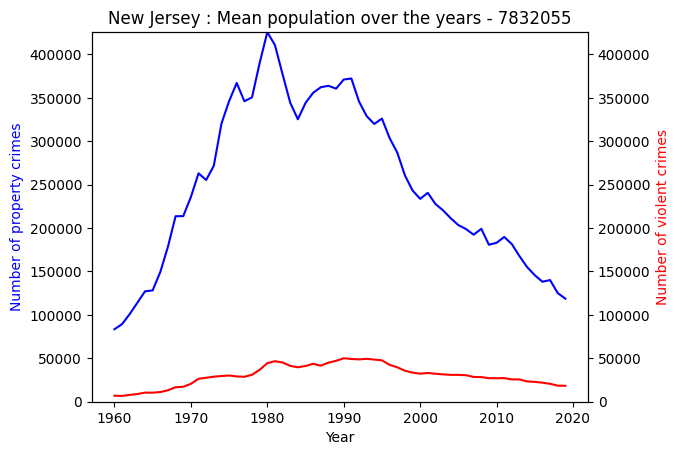

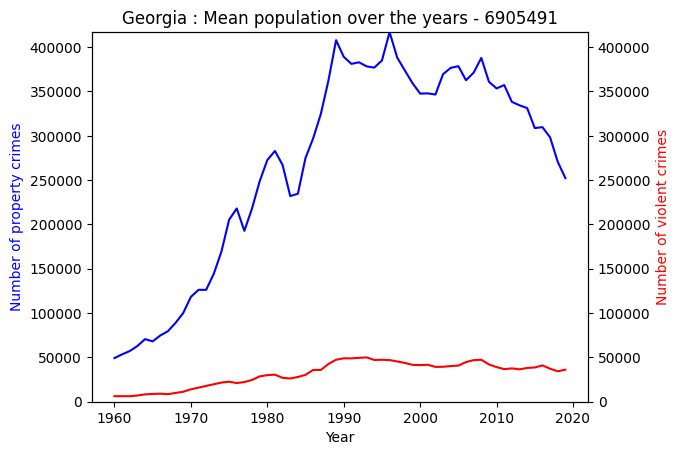

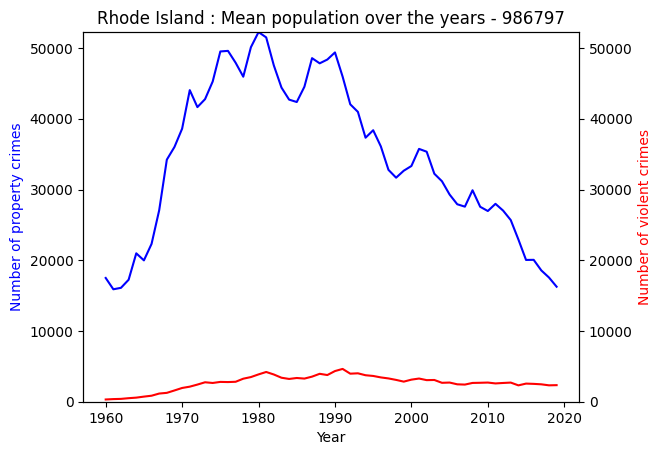

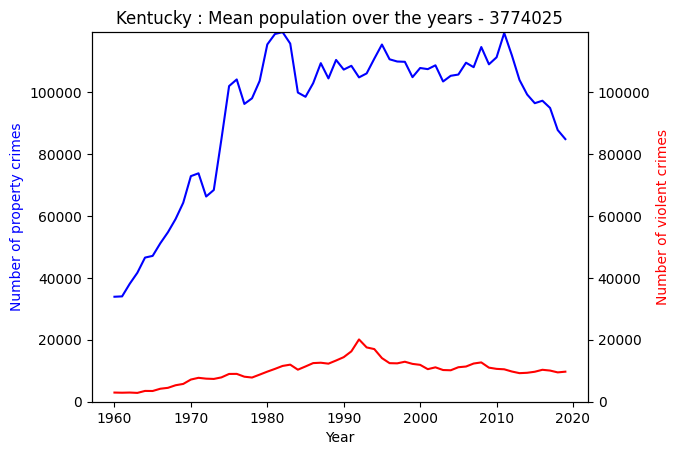

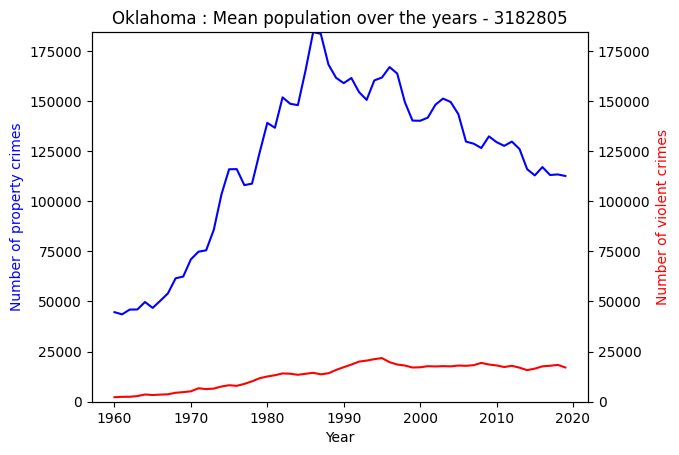

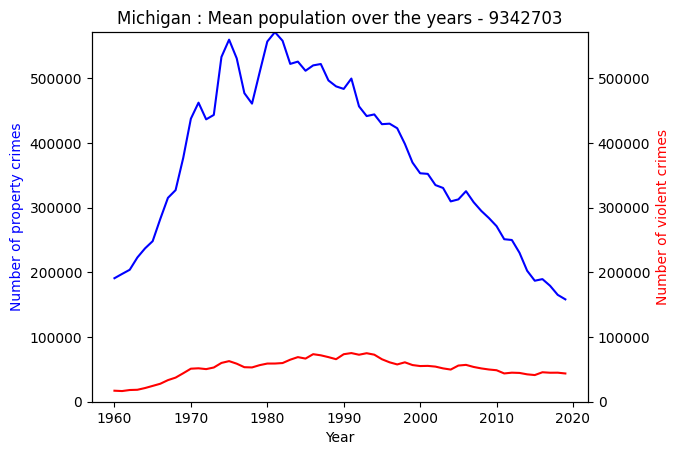

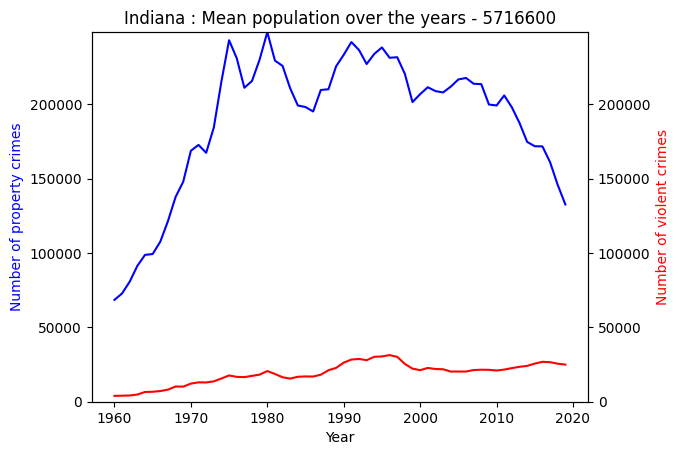

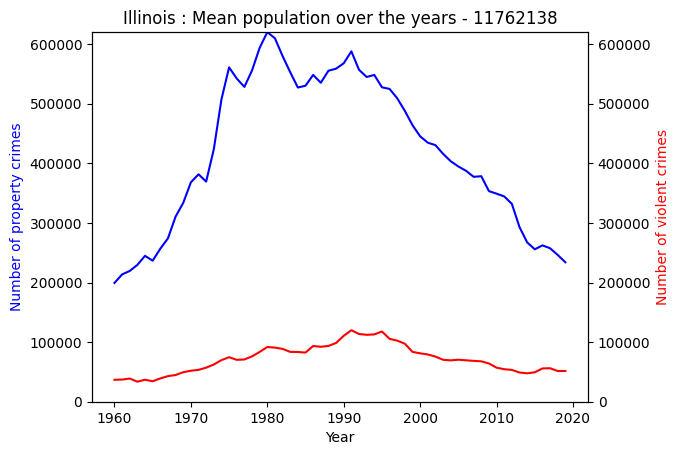

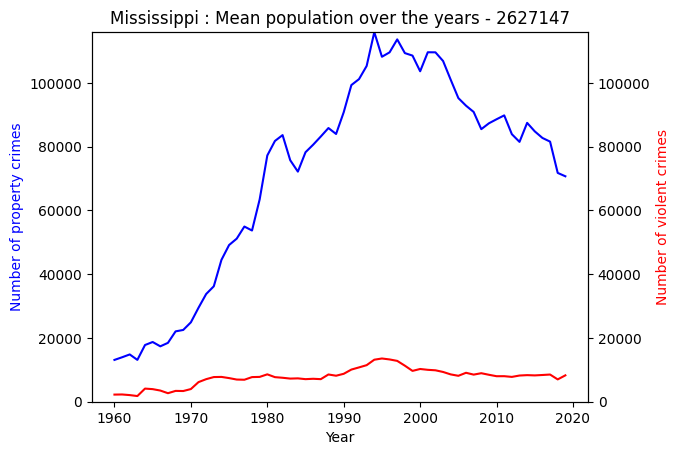

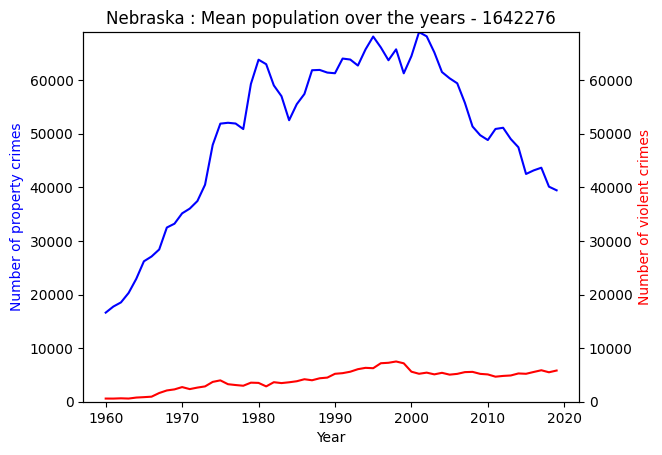

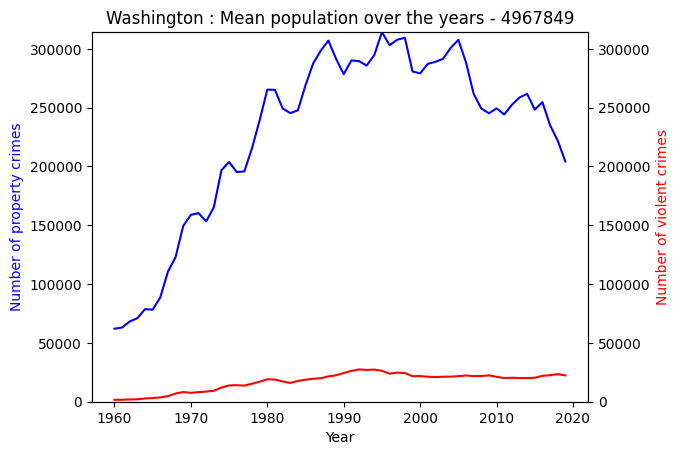

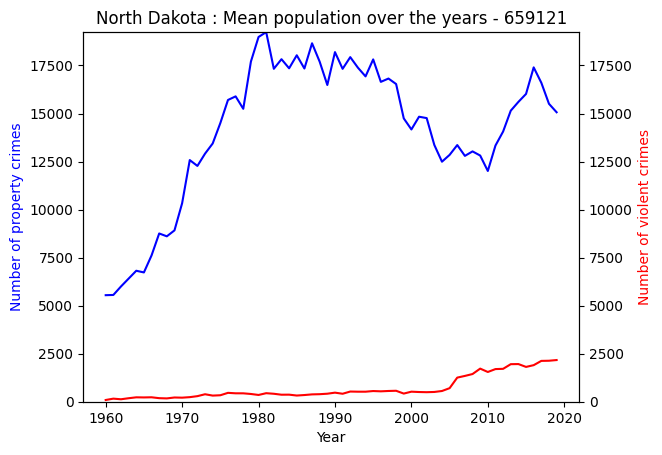

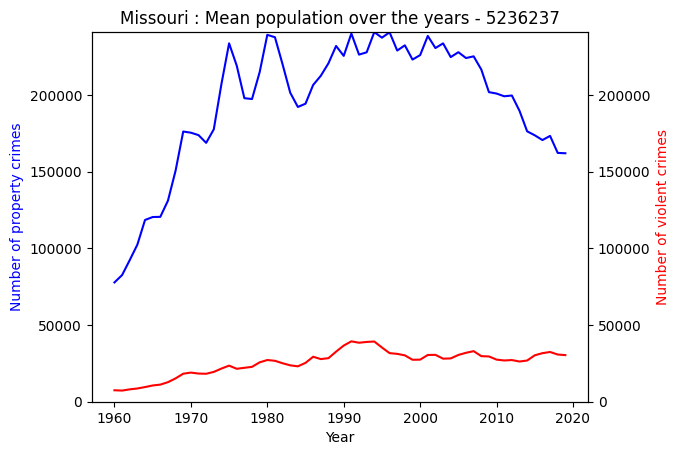

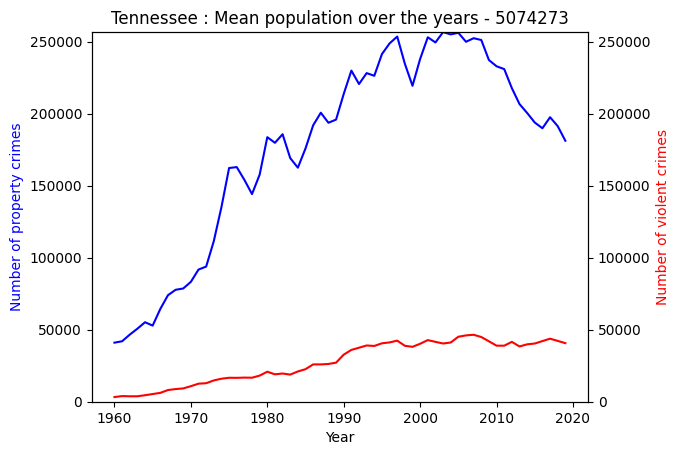

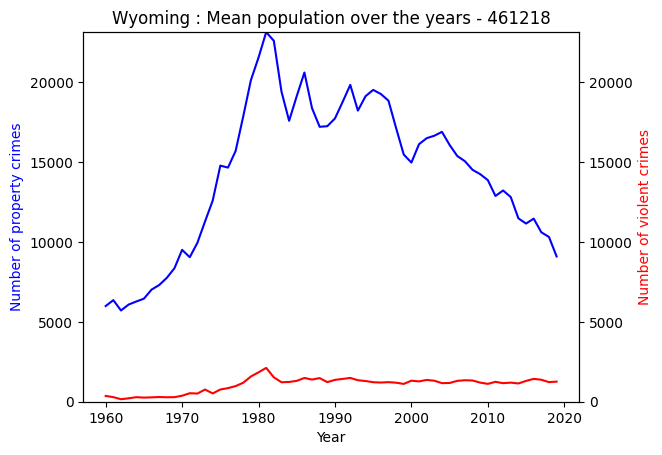

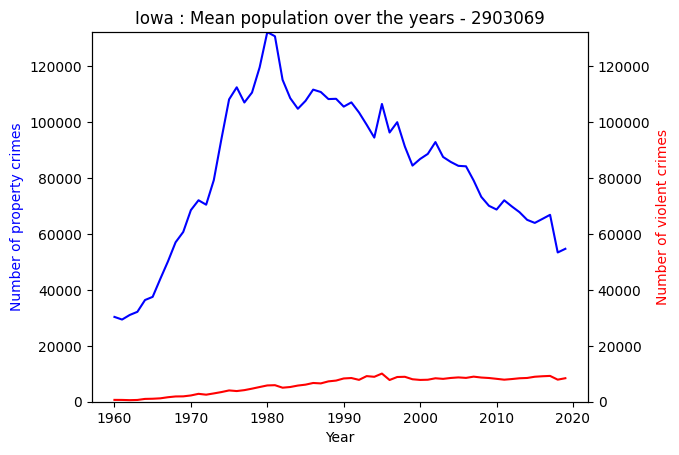

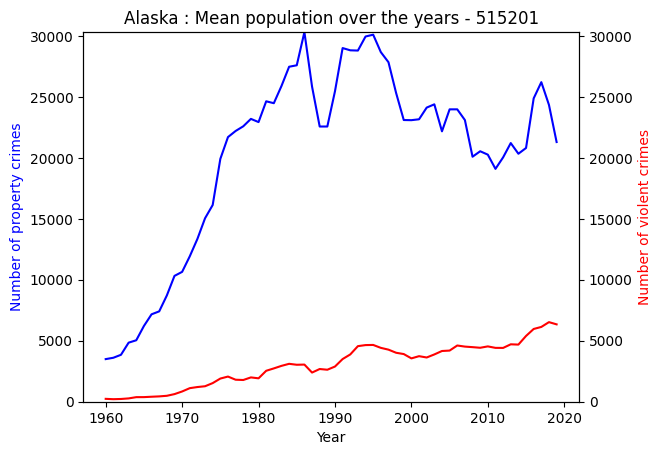

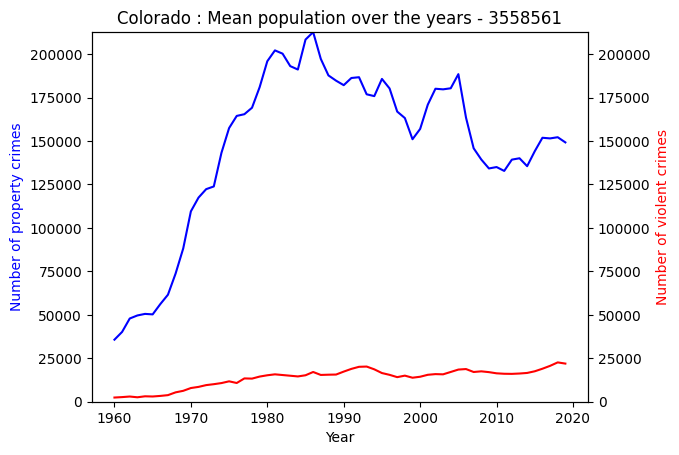

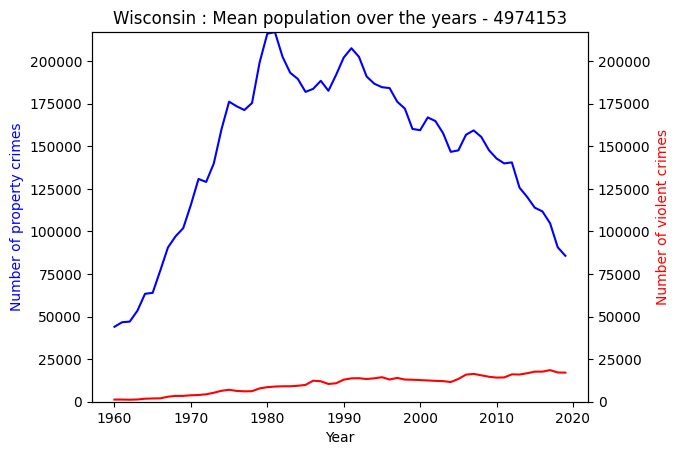

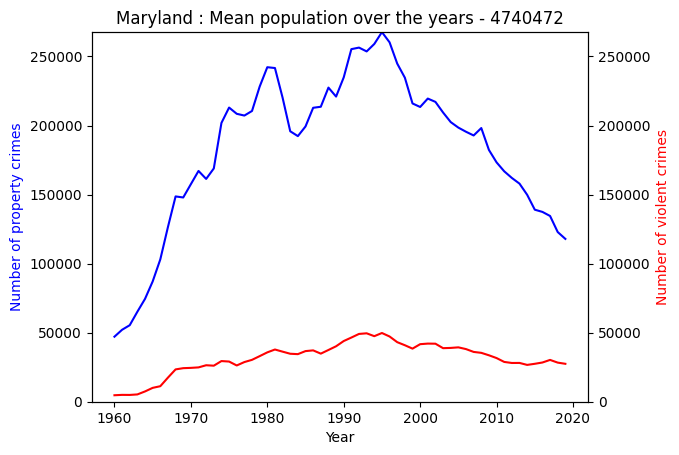

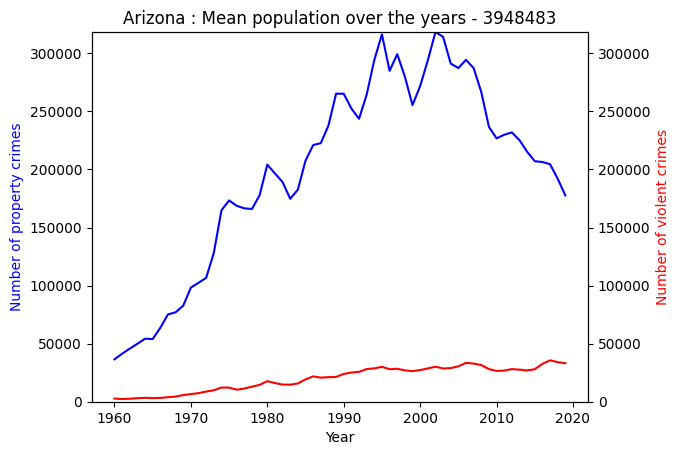

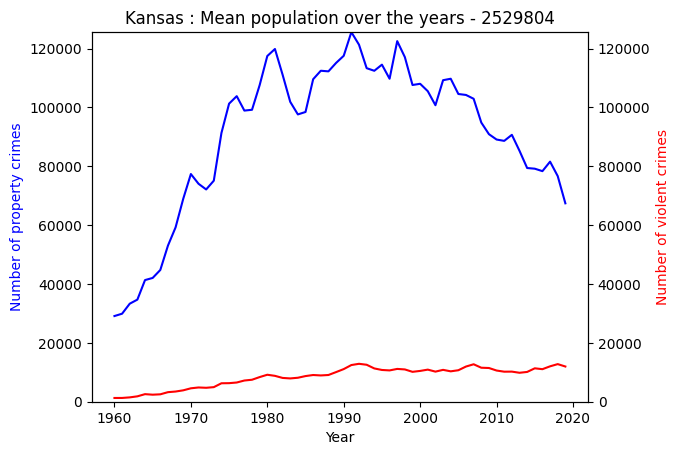

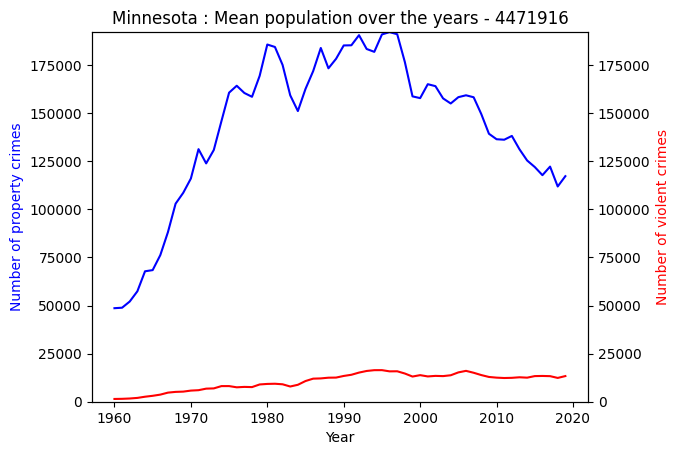

In [15]:
# make a list of state names from crime_data
state_name_list = crime_data['State'].tolist()
# get rid of duplicates
state_name_list = list(set(state_name_list))

for state in state_name_list:
    state_data = crime_data[crime_data['State'] == state]
    #create new figure and axes ax_1
    figure, ax_1 = plt.subplots()
    ax_1.plot(state_data['Year'], state_data['Data.Totals.Property.All'], label='Property crimes', color='blue')
    ax_1.set_xlabel('Year')
    ax_1.set_ylabel('Number of property crimes', color='blue')
    #create twin axis ax_2
    ax_2 = ax_1.twinx()
    ax_2.plot(state_data['Year'], state_data['Data.Totals.Violent.All'], label='Violent crimes', color='red')
    ax_2.set_ylabel('Number of violent crimes', color='red')
    max_property = state_data['Data.Totals.Property.All'].max()
    max_violent = state_data['Data.Totals.Violent.All'].max()
    # determine y axis limit
    y_max = max(max_property,max_violent)
    #make sure both y axes have the same range
    ax_1.set_ylim(0, y_max)
    ax_2.set_ylim(0, y_max)
    mean_population = state_data['Data.Population'].mean()
    plt.title(f'{state} : Mean population over the years - {int(mean_population)}')
    plt.show()





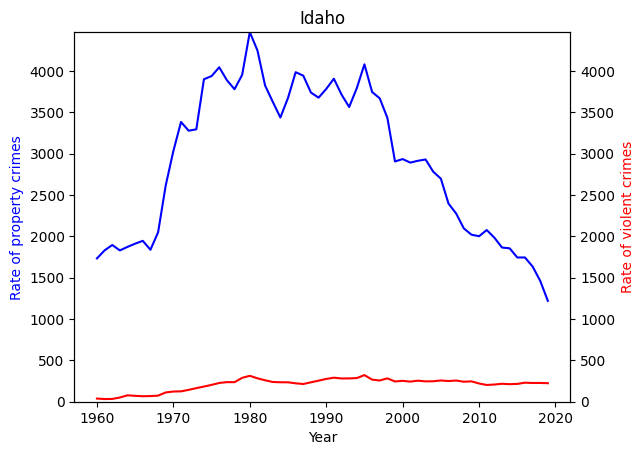

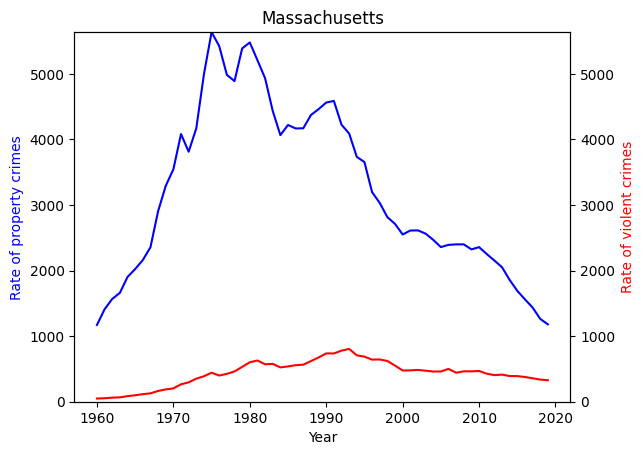

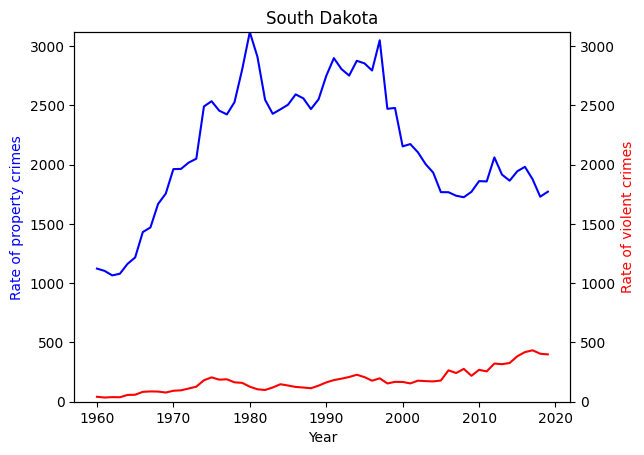

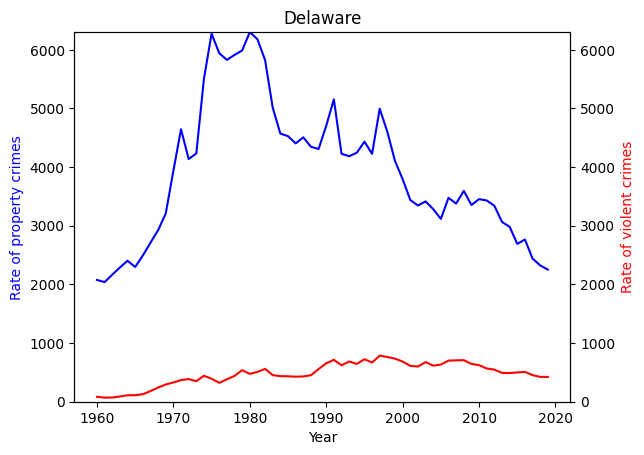

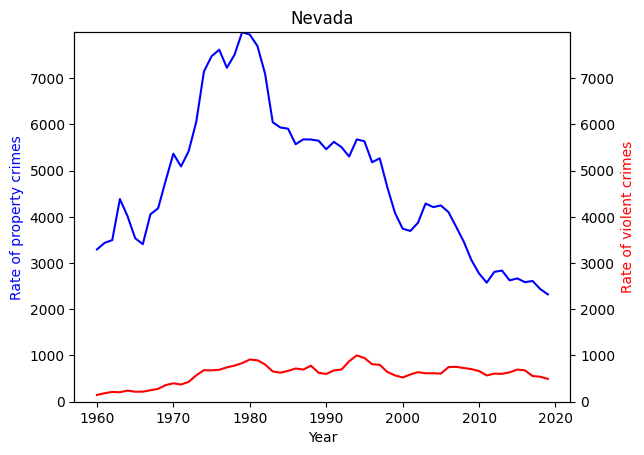

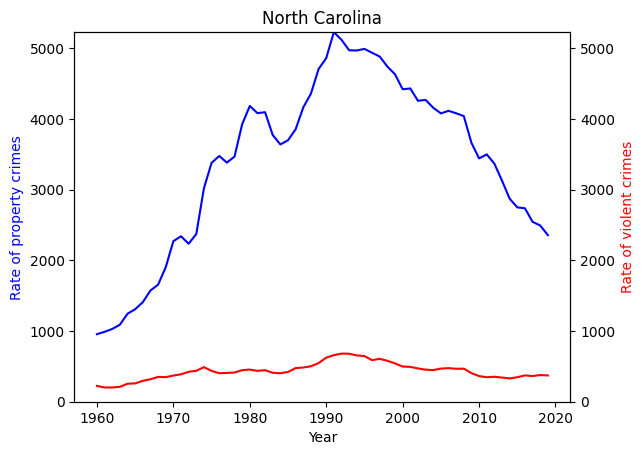

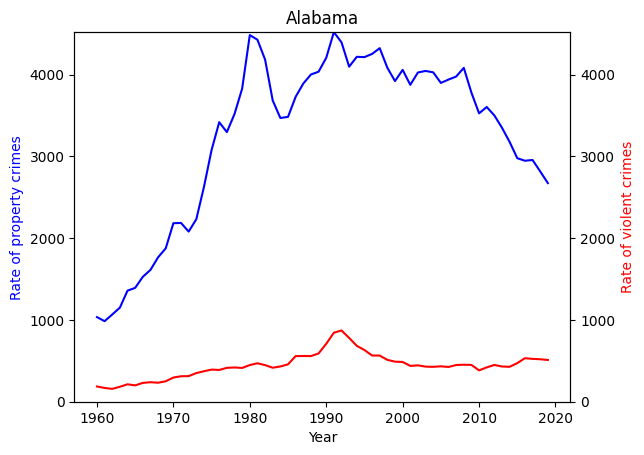

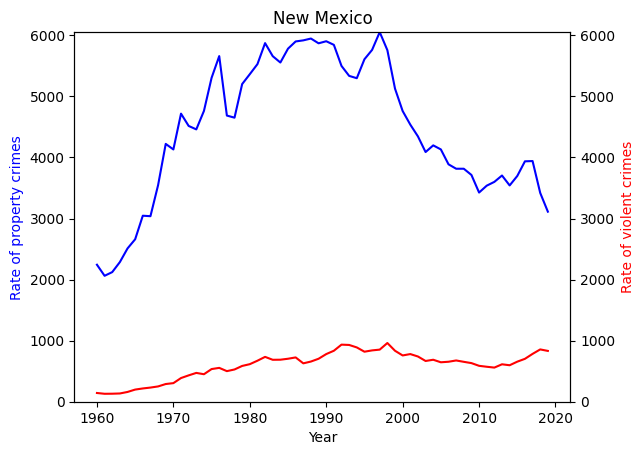

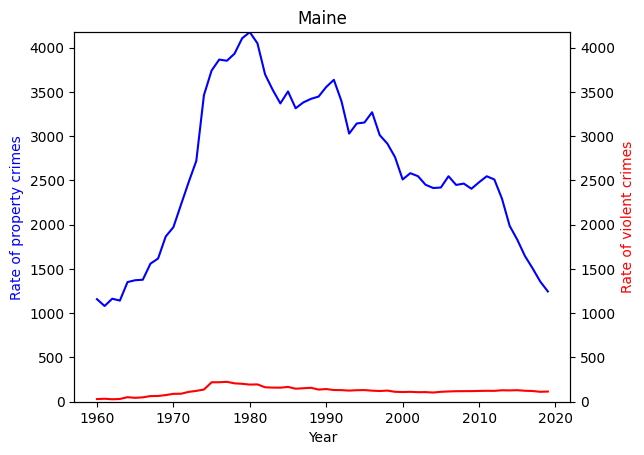

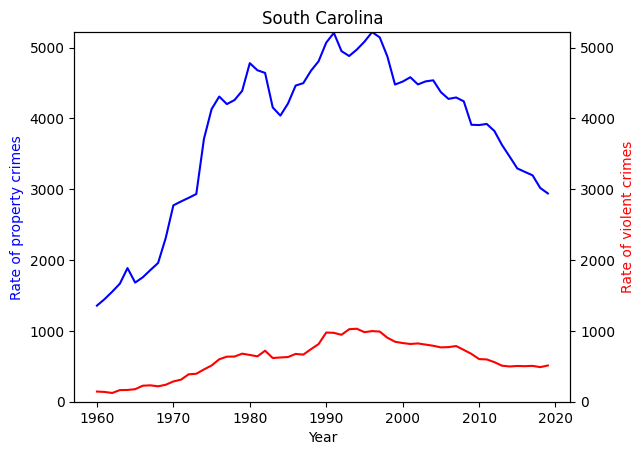

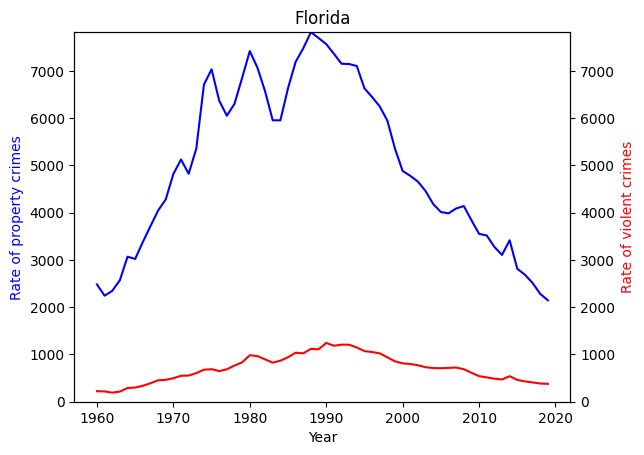

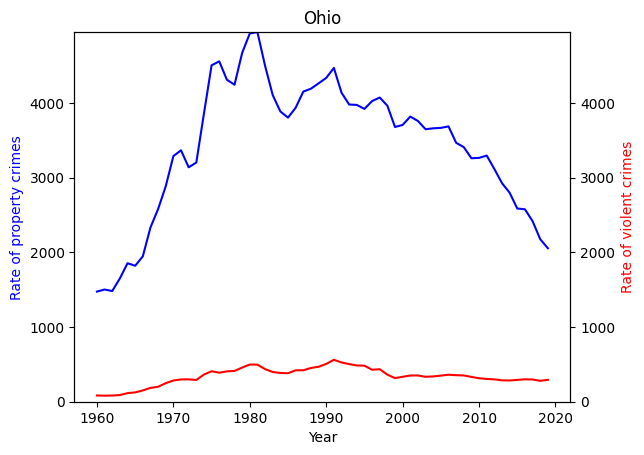

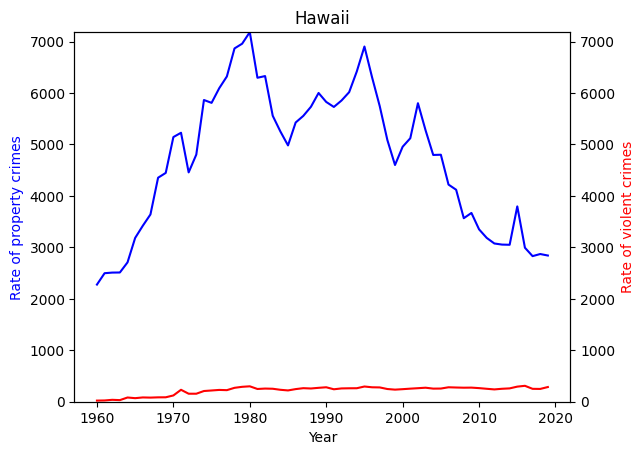

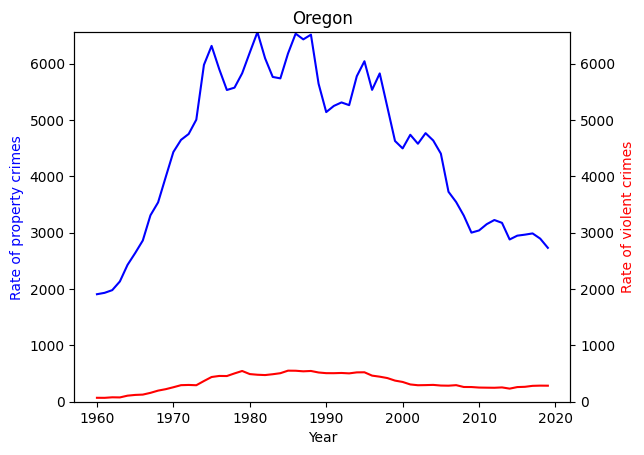

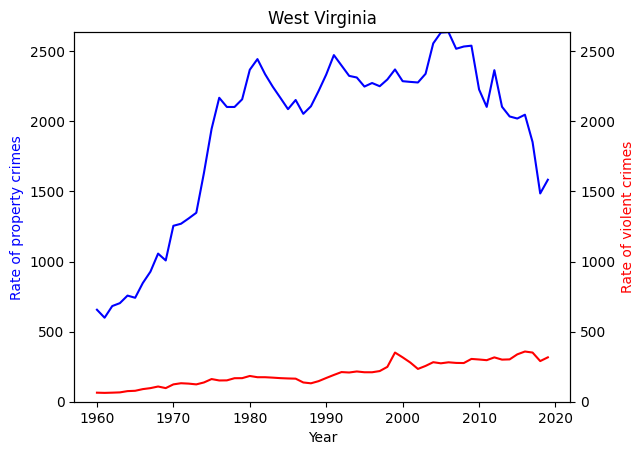

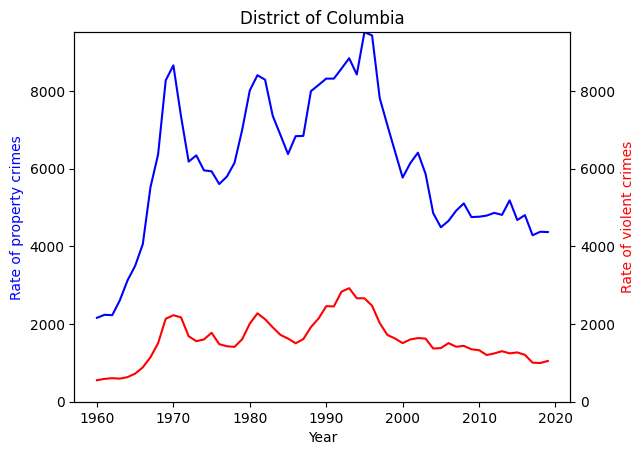

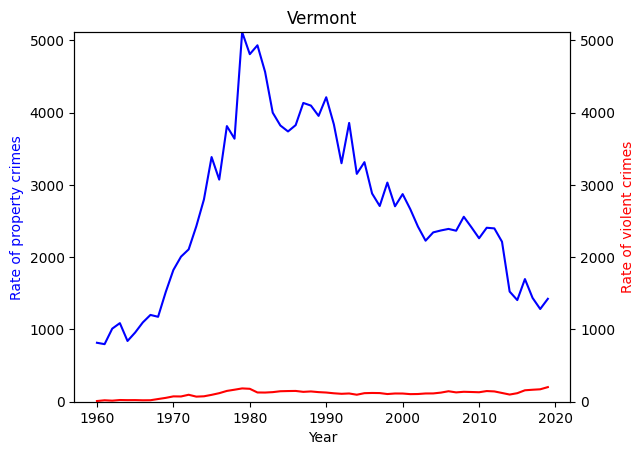

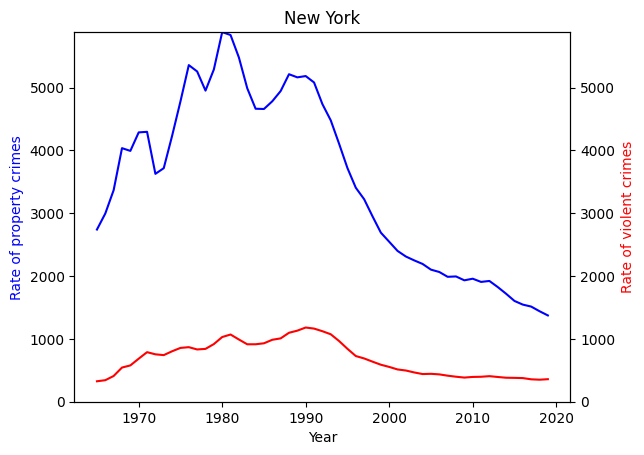

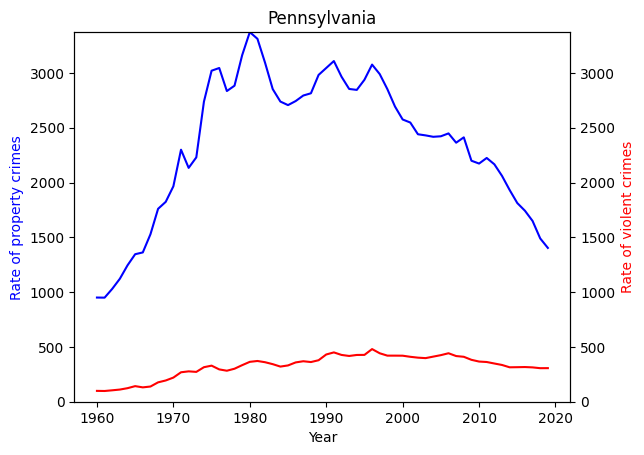

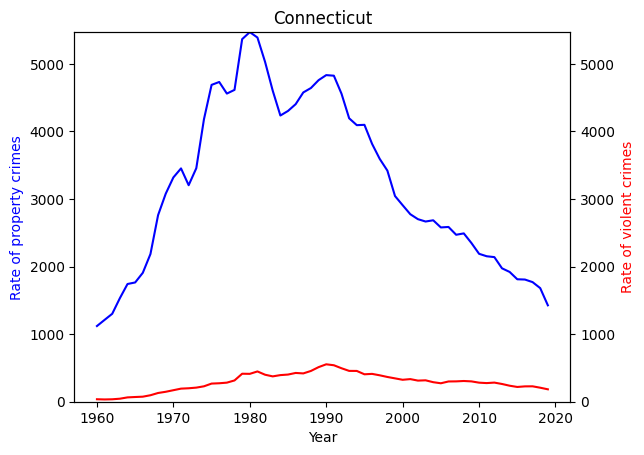

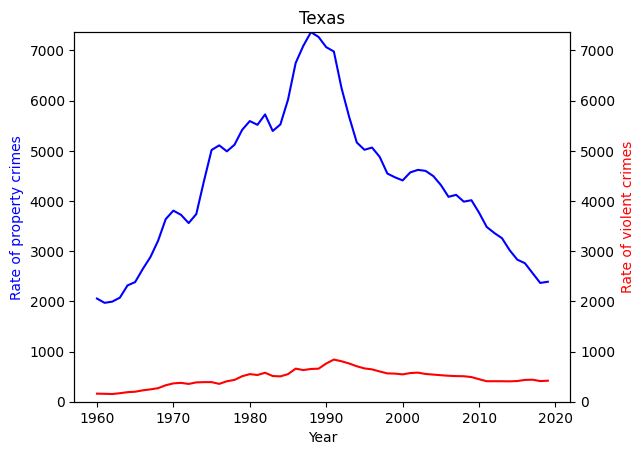

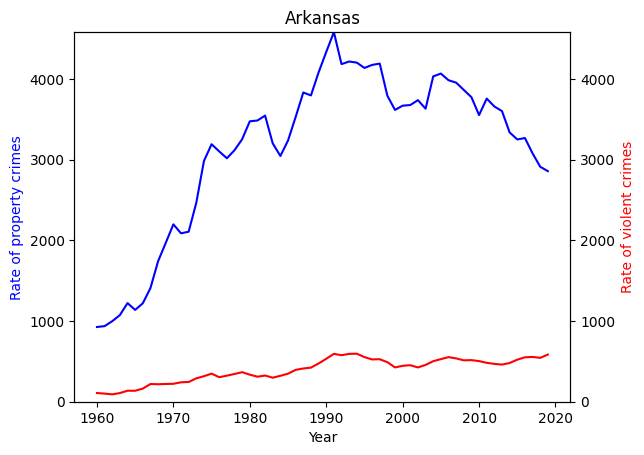

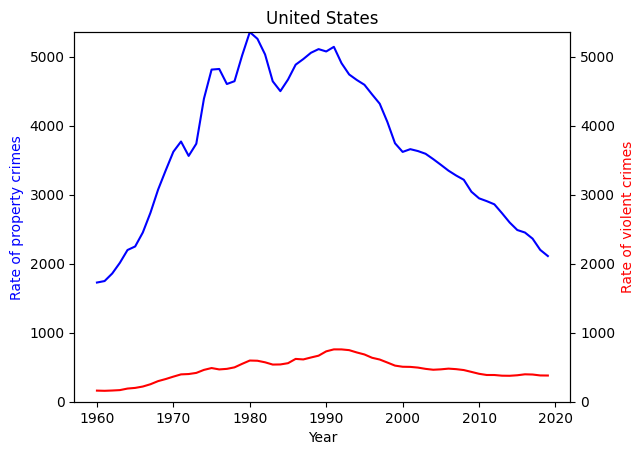

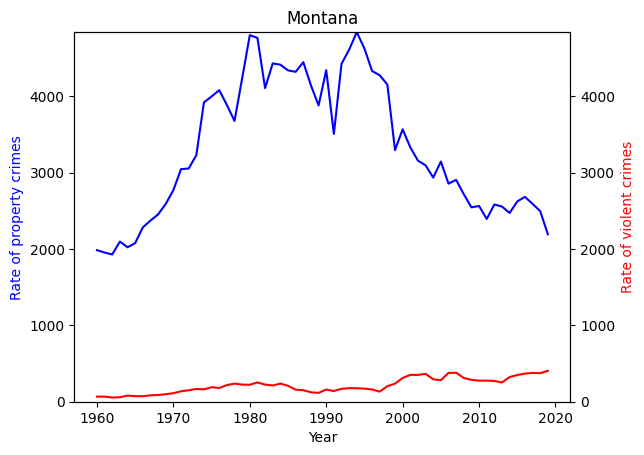

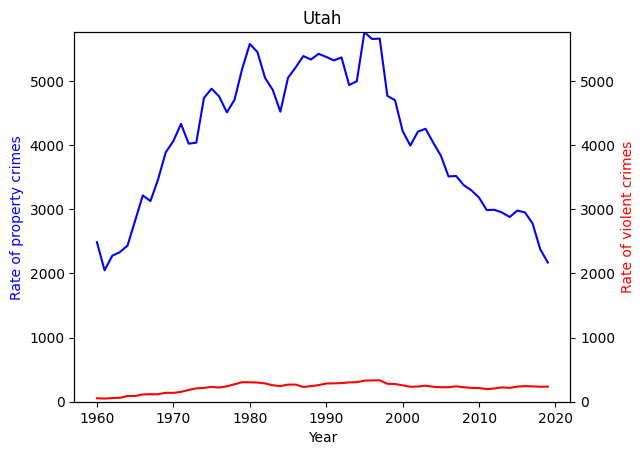

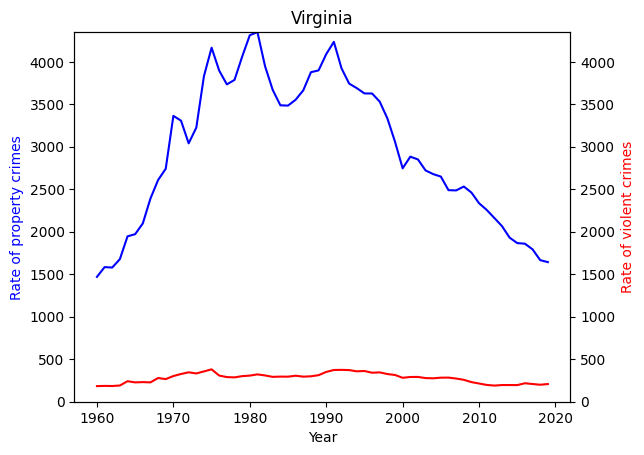

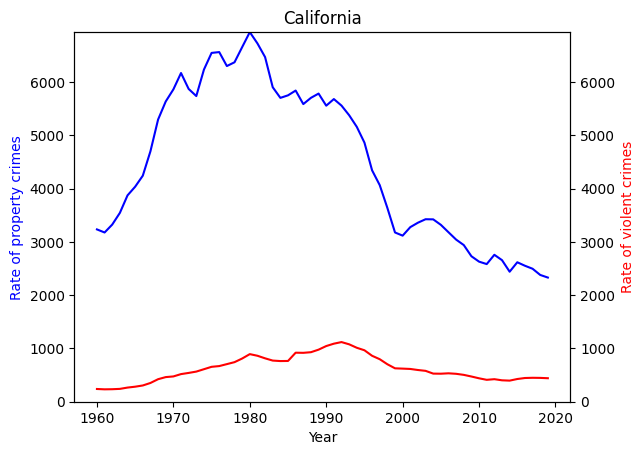

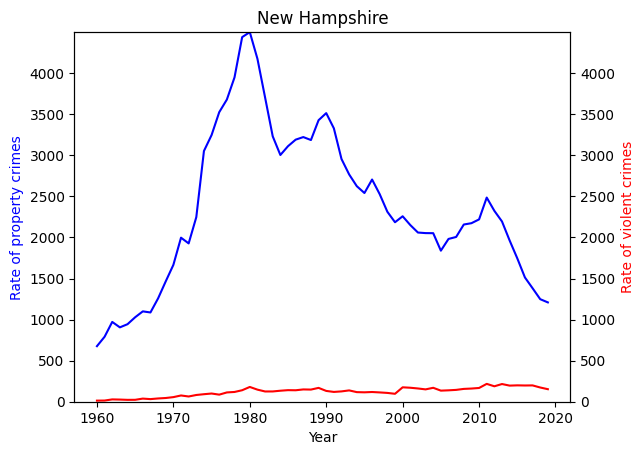

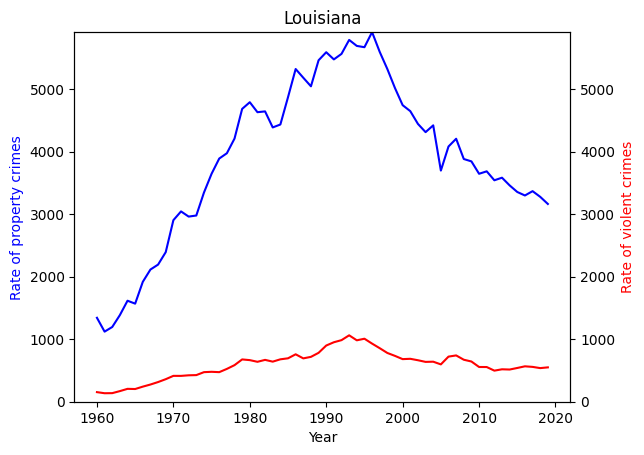

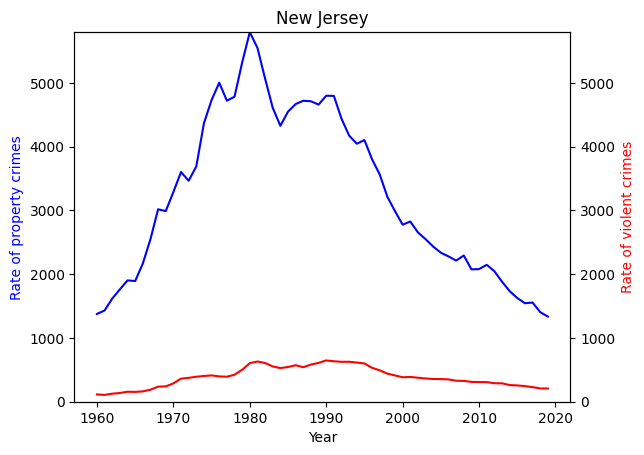

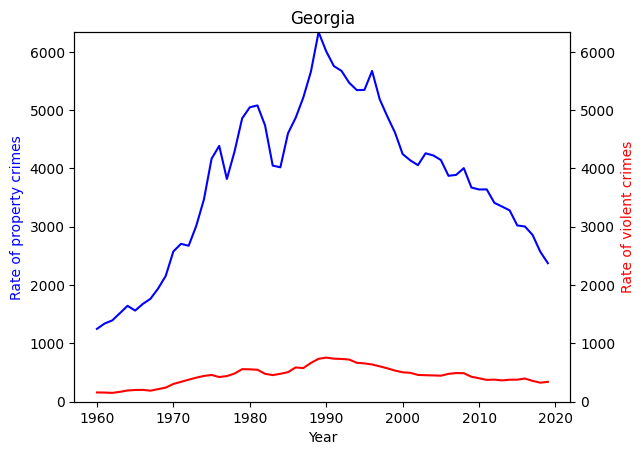

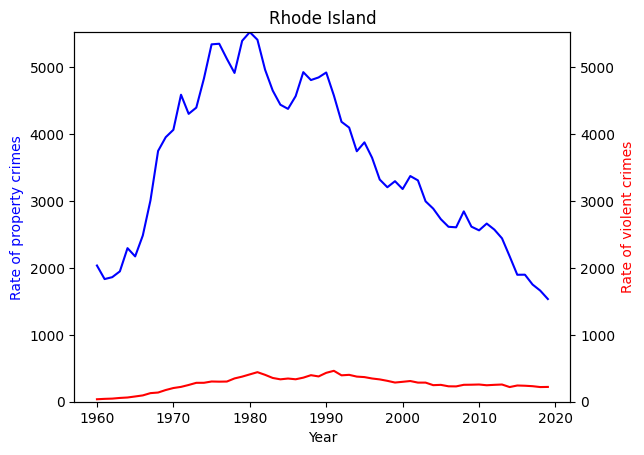

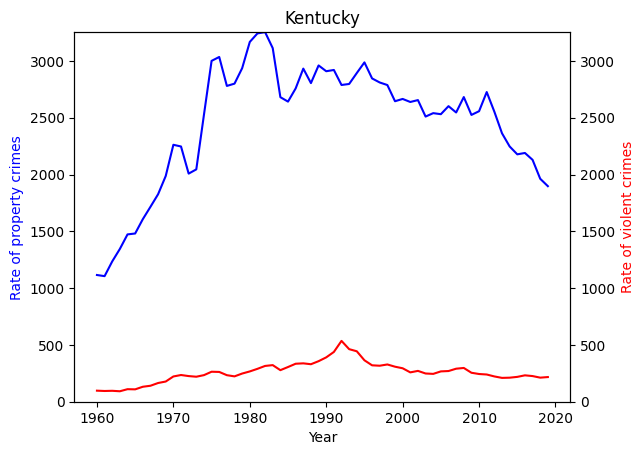

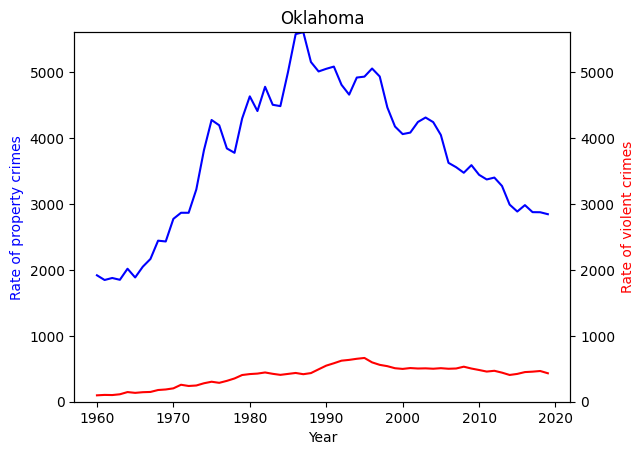

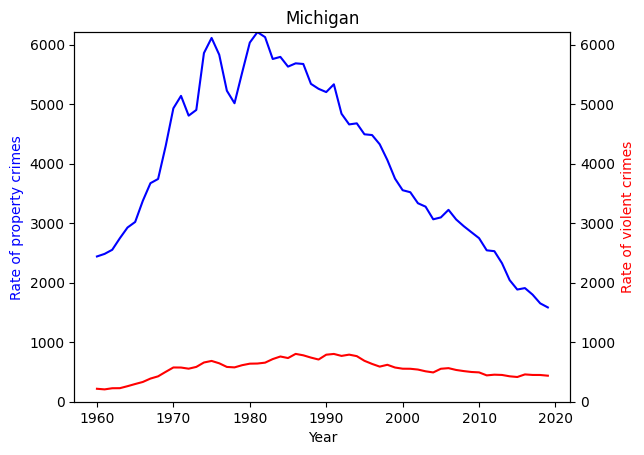

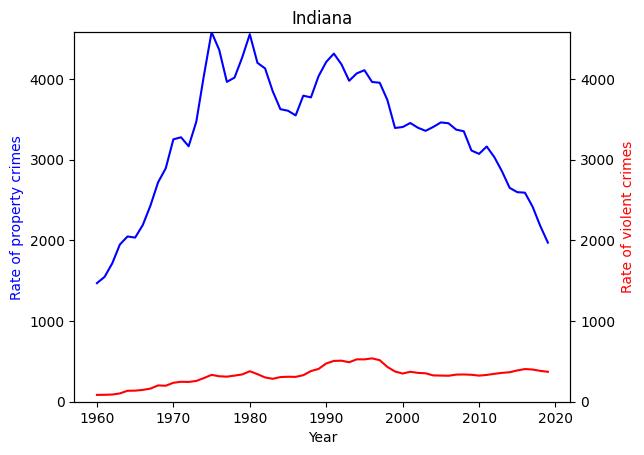

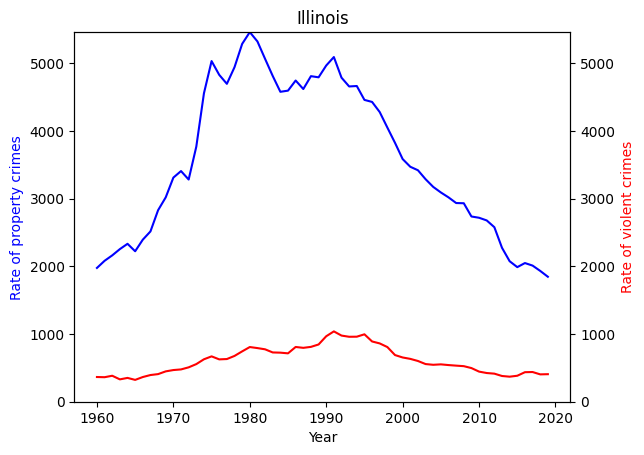

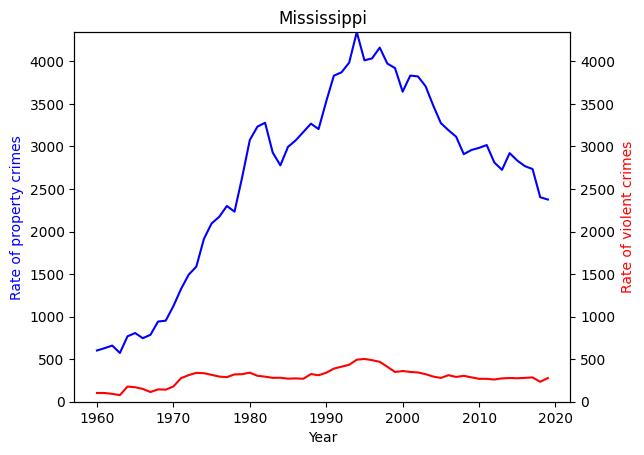

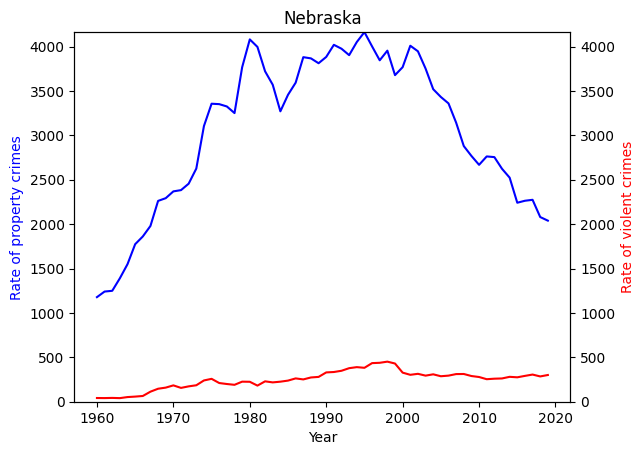

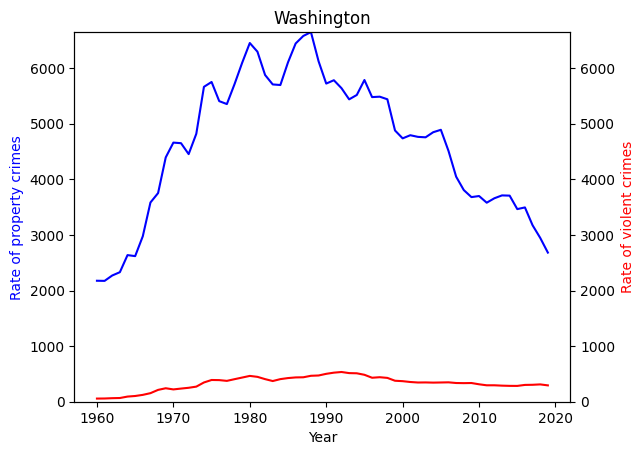

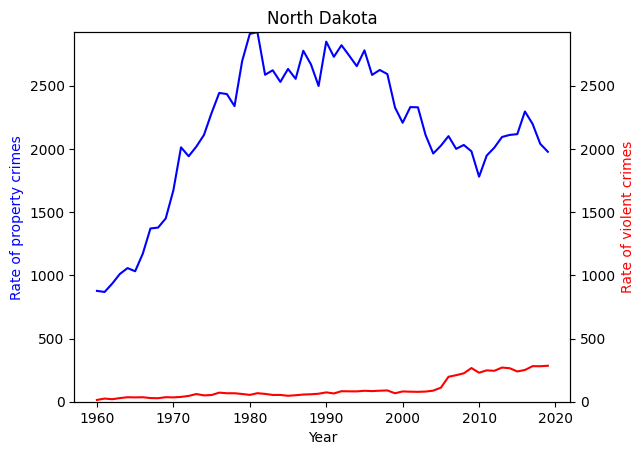

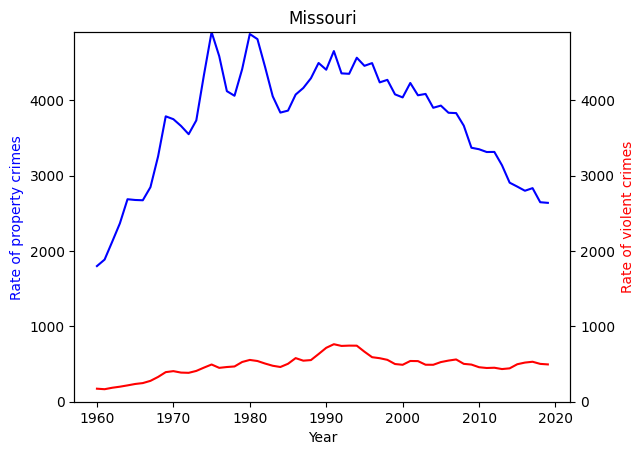

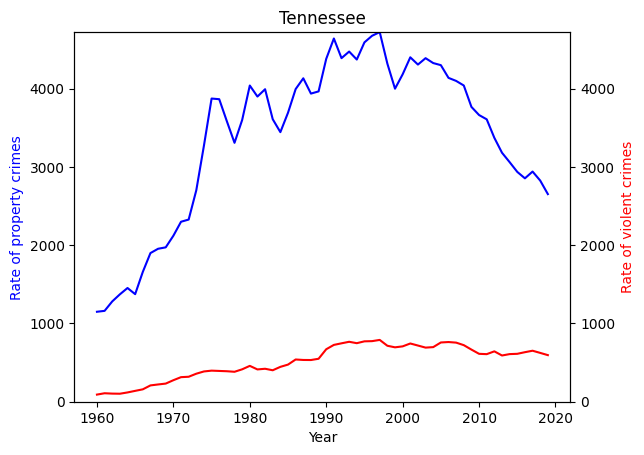

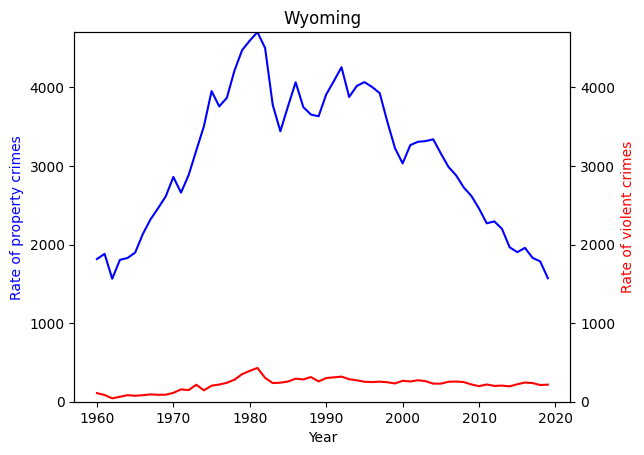

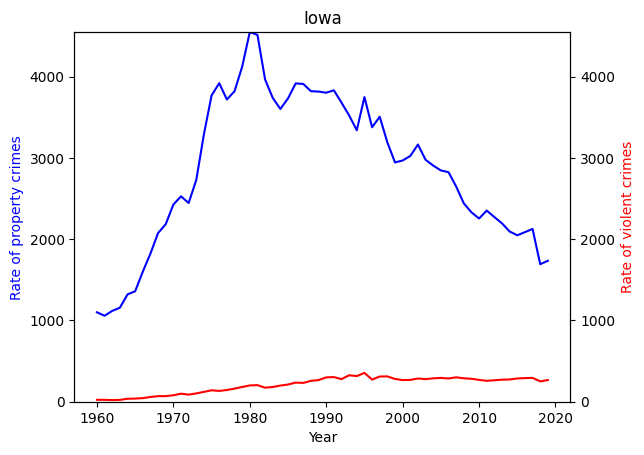

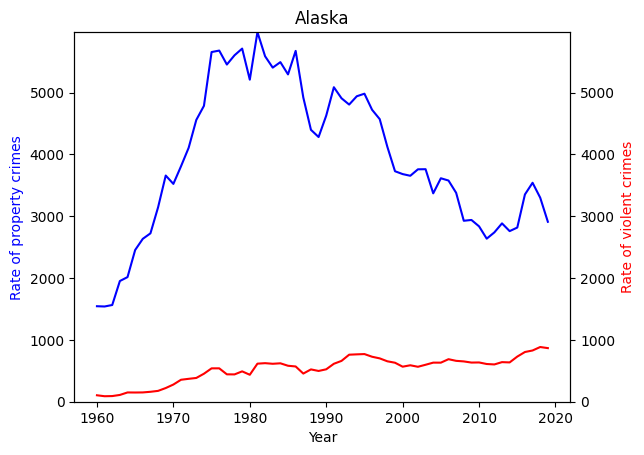

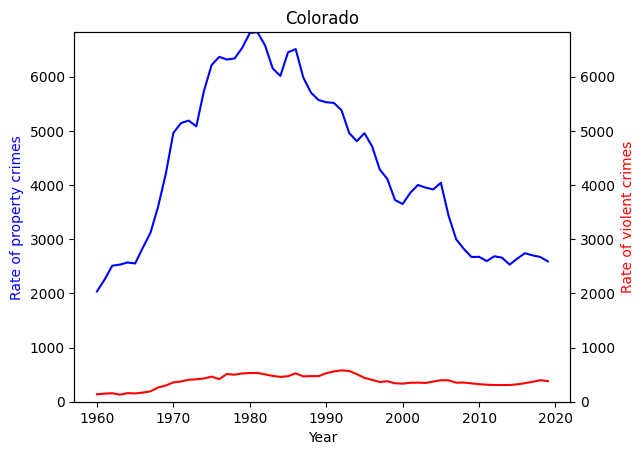

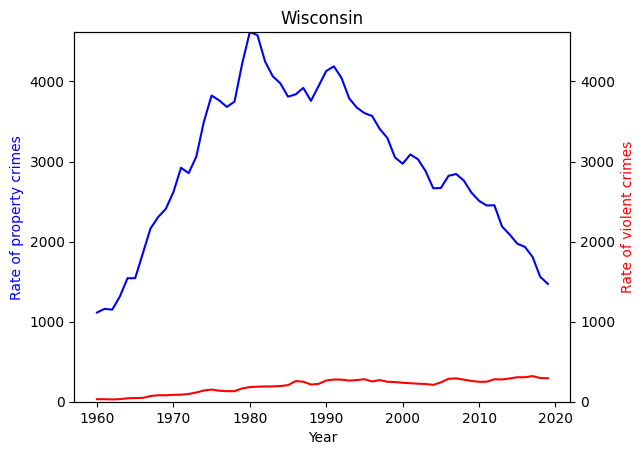

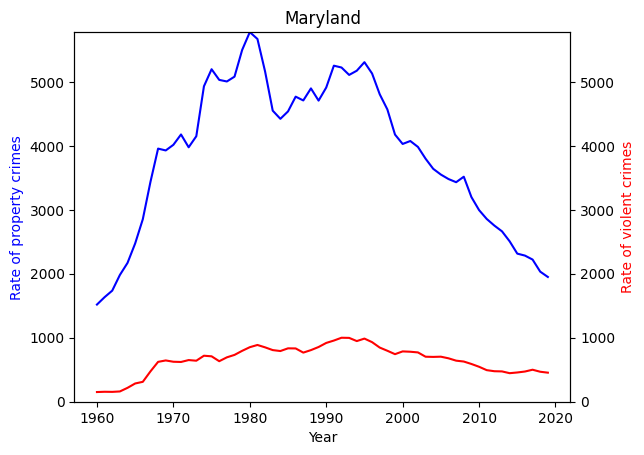

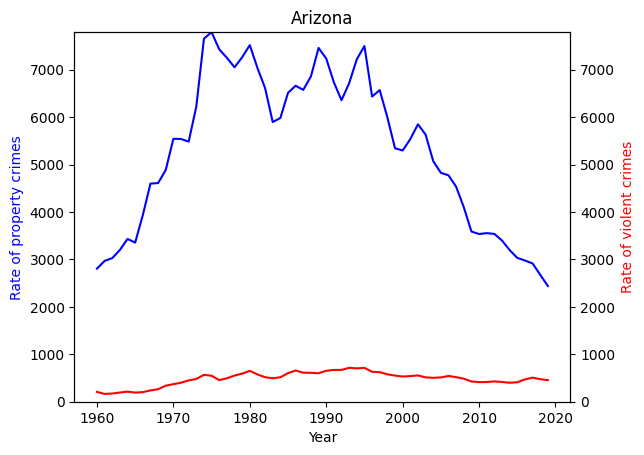

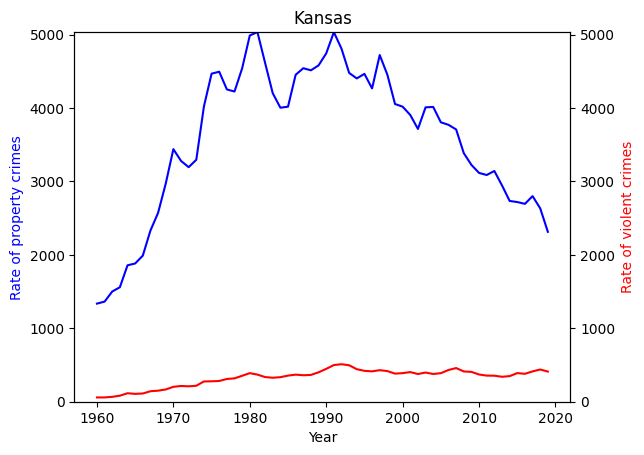

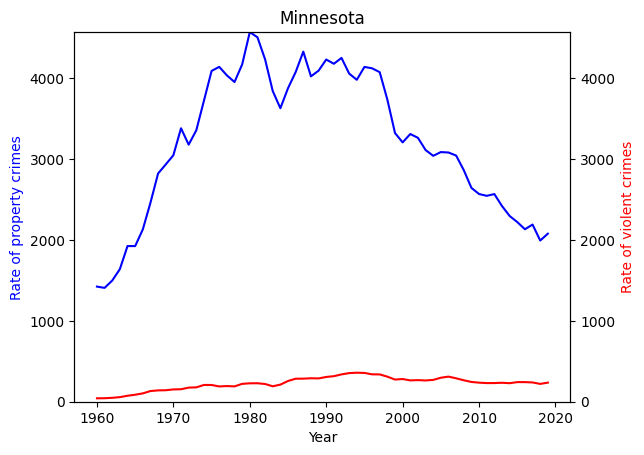

In [16]:
for state in state_name_list:
    state_data = crime_data[crime_data['State'] == state]
    #create new figure and axes ax_1
    figure, ax_1 = plt.subplots()
    ax_1.plot(state_data['Year'], state_data['Data.Rates.Property.All'], label='Property crimes', color='blue')
    ax_1.set_xlabel('Year')
    ax_1.set_ylabel('Rate of property crimes', color='blue')
    #create twin axis ax_2
    ax_2 = ax_1.twinx()
    ax_2.plot(state_data['Year'], state_data['Data.Rates.Violent.All'], label='Violent crimes', color='red')
    ax_2.set_ylabel('Rate of violent crimes', color='red')
    max_property = state_data['Data.Rates.Property.All'].max()
    max_violent = state_data['Data.Rates.Violent.All'].max()
    # determine y axis limit
    y_max = max(max_property,max_violent)
    #make sure both y axes have the same range
    ax_1.set_ylim(0, y_max)
    ax_2.set_ylim(0, y_max)
    plt.title(f'{state}')
    plt.show()

  
  

Now, after having visualization for each individual state, in case if you're interested about a particular state, let's find out the safest and most dangerous state according to data from years 1960-2019!
I will be assigning weight of 70% to violent crimes since it involves human life, which is more precious than anything else, in this case - properties.
To normalize data, we will be using MinMaxScaler from sklearn library 

In [30]:
#MinMaxScaler method
weight_property = 0.3
weight_violent = 0.7

crime_data_sklearn = crime_data.copy()
columns = ['Data.Rates.Property.All','Data.Rates.Violent.All']
for col in columns:
  crime_data_sklearn[col] = MinMaxScaler().fit_transform(np.array(crime_data_sklearn[col]).reshape(-1,1))

  
crime_data['Safety score'] = (crime_data_sklearn['Data.Rates.Property.All'] * weight_property) + (crime_data_sklearn['Data.Rates.Violent.All'] * weight_violent)

plt.bar(crime_data['State_Encoded'],crime_data['Safety score'])
plt.title('Safery Score by State')
plt.xlabel('Encoded States')
plt.ylabel('Safery Score')
plt.show()

print(f"MinMaxScaler Method: The safest state according to historical data is {crime_data.loc[crime_data['Safety score'].idxmin(), 'State']} with a safety score of {crime_data['Safety score'].min()}")

print(f"MinMaxScaler Method: The most dangerous state according to historical data is {crime_data.loc[crime_data['Safety score'].idxmax(), 'State']} with a safety score of {crime_data['Safety score'].max()}")





KeyError: 'State_Encoded'

As the result show, according to this dataset, by using rate of crime and weights given to crime type, the safest state is New Hampshire and the most dangerous state is District of Columbia!

Historical data can take us so far as we have seen from the graphs. Now let's jump to year 2050 and try to find out how the rate of crimes will change in these two states in future.
For the purposes of this analysis, we will choose to use Autoregressive Integrated Moving Average (ARIMA) statistical model

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Root Mean Squared Error for Property Rates: 328.16340617059114
Root Mean Squared Error for Violent Rates: 27.454519967879005


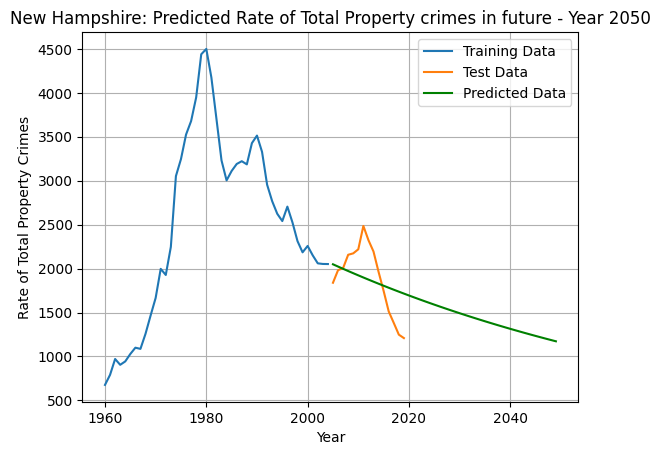

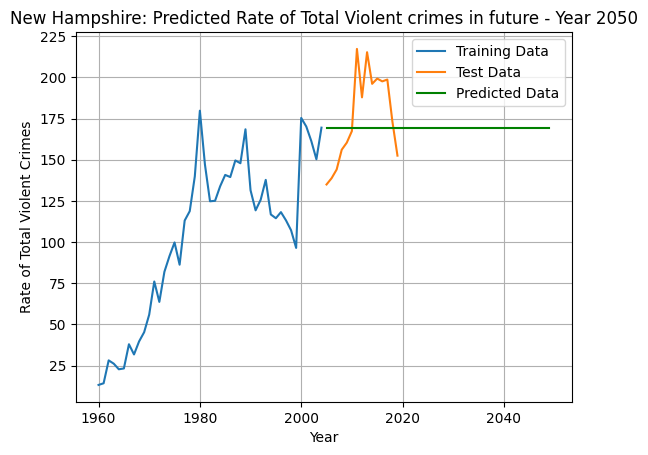

In [29]:
new_hampshire_data = crime_data[crime_data['State'] == 'New Hampshire']
new_hampshire_data.set_index('Year', inplace=True)

# split data into training and test sets

#property
training_prop = new_hampshire_data.iloc[:-15, :]
test_prop = new_hampshire_data.iloc[-15:, :]

#violence
training_viol = new_hampshire_data.iloc[:-15, :]
test_viol = new_hampshire_data.iloc[-15:, :]

# train the ARIMA model
model_prop = auto_arima(y=training_prop['Data.Rates.Property.All'], seasonal=False)
model_viol = auto_arima(y=training_viol['Data.Rates.Violent.All'], seasonal=False)

# forecast for year 2050
n_periods = 45
predictions_prop = model_prop.predict(n_periods=n_periods)
predictions_viol = model_viol.predict(n_periods=n_periods)
# start from the year of test set
prediction_index_prop = pd.date_range(start='2005', periods=n_periods, freq='Y')
prediction_index_viol = pd.date_range(start='2005', periods=n_periods, freq='Y')

# make 'data.rates.proprerty.all' into a list for error calculation
#property
test_set_property_rates = test_prop['Data.Rates.Property.All'].tolist()
predictions_set_property_rates = predictions_prop.tolist()

#violence
test_set_violent_rates = test_viol['Data.Rates.Violent.All'].tolist()
predictions_set_violent_rates = predictions_viol.tolist()

squared_diff_sum = 0

for test_value,pred_value in zip(test_set_property_rates,predictions_set_property_rates):
  squared_diff = (pred_value - test_value) ** 2
  squared_diff_sum += squared_diff

rmse = math.sqrt(squared_diff_sum / len(test_set_property_rates))
print("Root Mean Squared Error for Property Rates:", rmse)


squared_diff_sum_1 = 0

for test_value,pred_value in zip(test_set_violent_rates,predictions_set_violent_rates):
  squared_diff_1 = (pred_value - test_value) ** 2
  squared_diff_sum_1 += squared_diff_1

rmse_1 = math.sqrt(squared_diff_sum_1 / len(test_set_violent_rates))
print("Root Mean Squared Error for Violent Rates:", rmse_1)

#-----Property Crimes
fig,ax=plt.subplots()
ax = training_prop['Data.Rates.Property.All'].plot(legend = True,label='Training Data')
test_prop['Data.Rates.Property.All'].plot(legend = True,ax=ax, label = 'Test Data')
ax.plot(prediction_index_prop.year,predictions_prop,label = 'Predicted Data', color = 'green')
ax.legend()
plt.grid(True)
plt.title('New Hampshire: Predicted Rate of Total Property crimes in future - Year 2050')
plt.xlabel('Year')
plt.ylabel('Rate of Total Property Crimes')
plt.show()

#----Violent Crimes
fig_1,ax_1=plt.subplots()
ax_1 = training_viol['Data.Rates.Violent.All'].plot(legend = True,label='Training Data')
test_viol['Data.Rates.Violent.All'].plot(legend = True,ax=ax_1, label = 'Test Data')
ax_1.plot(prediction_index_viol.year,predictions_viol,label = 'Predicted Data', color = 'green')
ax_1.legend()
plt.grid(True)
plt.title('New Hampshire: Predicted Rate of Total Violent crimes in future - Year 2050')
plt.xlabel('Year')
plt.ylabel('Rate of Total Violent Crimes')
plt.show()



/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Root Mean Squared Error for Property Rates: 681.0253039858885
Root Mean Squared Error for Violent Rates: 189.75492779963125


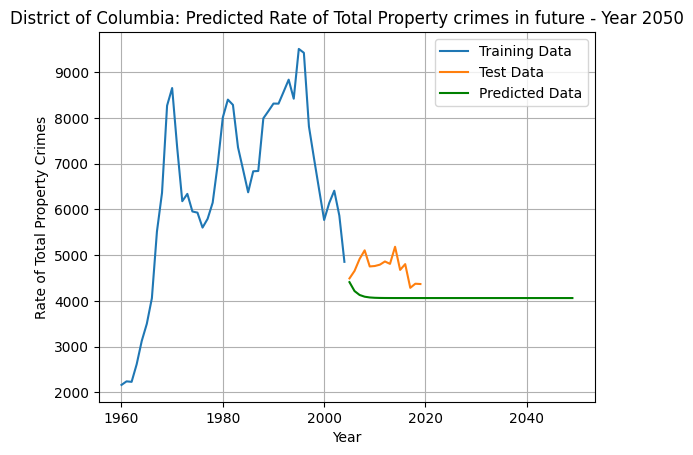

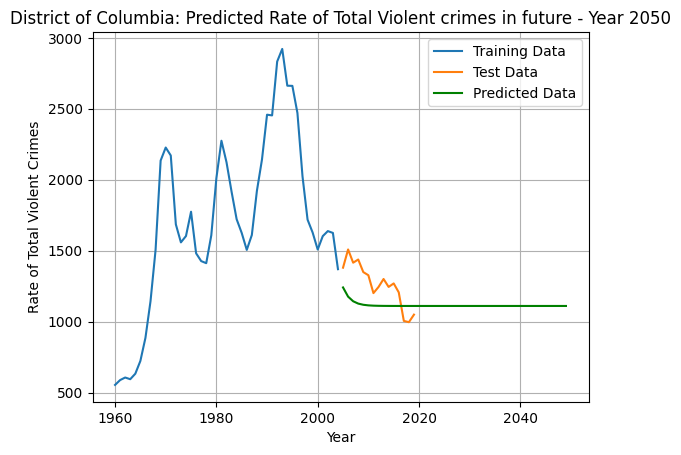

In [19]:
dc_data = crime_data[crime_data['State'] == 'District of Columbia']
dc_data.set_index('Year', inplace=True)

# split data into training and test sets

#property
training_prop = dc_data.iloc[:-15, :]
test_prop = dc_data.iloc[-15:, :]

#violence
training_viol = dc_data.iloc[:-15, :]
test_viol = dc_data.iloc[-15:, :]

# train the ARIMA model
model_prop = auto_arima(y=training_prop['Data.Rates.Property.All'], seasonal=False)
model_viol = auto_arima(y=training_viol['Data.Rates.Violent.All'], seasonal=False)

# forecast for year 2050
n_periods = 45
predictions_prop = model_prop.predict(n_periods=n_periods)
predictions_viol = model_viol.predict(n_periods=n_periods)
# start from the year of test set
prediction_index_prop = pd.date_range(start='2005', periods=n_periods, freq='Y')
prediction_index_viol = pd.date_range(start='2005', periods=n_periods, freq='Y')

# make 'data.rates.proprerty.all' into a list for error calculation
#property
test_set_property_rates = test_prop['Data.Rates.Property.All'].tolist()
predictions_set_property_rates = predictions_prop.tolist()

#violence
test_set_violent_rates = test_viol['Data.Rates.Violent.All'].tolist()
predictions_set_violent_rates = predictions_viol.tolist()

squared_diff_sum = 0

for test_value,pred_value in zip(test_set_property_rates,predictions_set_property_rates):
  squared_diff = (pred_value - test_value) ** 2
  squared_diff_sum += squared_diff

rmse = math.sqrt(squared_diff_sum / len(test_set_property_rates))
print("Root Mean Squared Error for Property Rates:", rmse)


squared_diff_sum_1 = 0

for test_value,pred_value in zip(test_set_violent_rates,predictions_set_violent_rates):
  squared_diff_1 = (pred_value - test_value) ** 2
  squared_diff_sum_1 += squared_diff_1

rmse_1 = math.sqrt(squared_diff_sum_1 / len(test_set_violent_rates))
print("Root Mean Squared Error for Violent Rates:", rmse_1)

#-----Property Crimes
fig,ax=plt.subplots()
ax = training_prop['Data.Rates.Property.All'].plot(legend = True,label='Training Data')
test_prop['Data.Rates.Property.All'].plot(legend = True,ax=ax, label = 'Test Data')
ax.plot(prediction_index_prop.year,predictions_prop,label = 'Predicted Data', color = 'green')
ax.legend()
plt.grid(True)
plt.title('District of Columbia: Predicted Rate of Total Property crimes in future - Year 2050')
plt.xlabel('Year')
plt.ylabel('Rate of Total Property Crimes')
plt.show()

#----Violent Crimes
fig_1,ax_1=plt.subplots()
ax_1 = training_viol['Data.Rates.Violent.All'].plot(legend = True,label='Training Data')
test_viol['Data.Rates.Violent.All'].plot(legend = True,ax=ax_1, label = 'Test Data')
ax_1.plot(prediction_index_viol.year,predictions_viol,label = 'Predicted Data', color = 'green')
ax_1.legend()
plt.grid(True)
plt.title('District of Columbia: Predicted Rate of Total Violent crimes in future - Year 2050')
plt.xlabel('Year')
plt.ylabel('Rate of Total Violent Crimes')
plt.show()


It is important to note that we have to consider the Root Mean Squared Error when analyzing results. However, as you can see, our predictions follow the general trend as the test data in the beginning

Now, let's dive into Reddit and see what people say about District of Columbia and New Hampshire in terms of crime and safety!

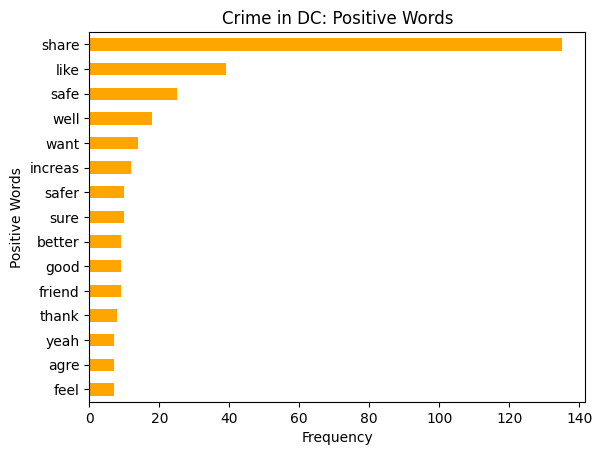

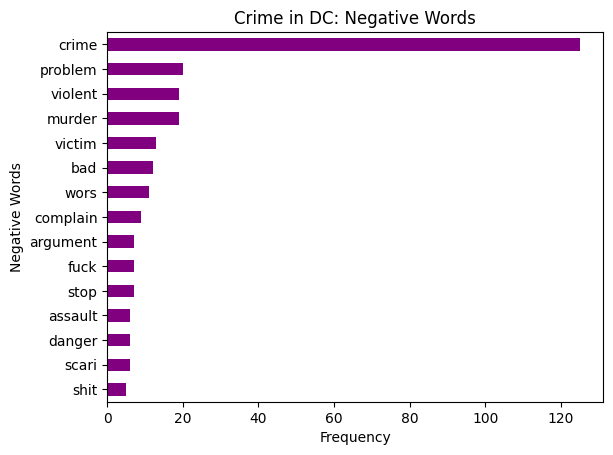

In [20]:
#website - url - https://www.reddit.com/r/washingtondc/comments/xx6g4e/crime_in_dc/

with open('reddit_DC.txt', 'r') as file:
    dc_reddit_content = file.read()
dc_reddit_content = dc_reddit_content.lower()

sia = vader.SentimentIntensityAnalyzer()
dc_reddit_word_token = word_tokenize(dc_reddit_content)

myStopWords = stopwords.words('english')
#get rid of stopwords
dc_reddit_content_nostop = [w for w in dc_reddit_word_token if w not in myStopWords]
#get rid of numbers
dc_reddit_cleaned = [w for w in dc_reddit_content_nostop if not w.isdigit()]

pos_word_list = []
neg_word_list = []

for word in dc_reddit_cleaned:
    score = sia.polarity_scores(word)
    if score['compound'] > 0:
        pos_word_list.append(word)
    elif score['compound'] < 0:
        neg_word_list.append(word)
        
stemmed_positive_words = [PorterStemmer().stem(w) for w in pos_word_list]
most_positive_words = nltk.FreqDist(stemmed_positive_words).most_common(15)
most_positive_words.reverse() #so its similiar to the graphs shown


stemmed_negative_words = [PorterStemmer().stem(w) for w in neg_word_list]
most_negative_words = nltk.FreqDist(stemmed_negative_words).most_common(15)
most_negative_words.reverse()

# Positive: horizontal bar plot
df = pd.DataFrame(most_positive_words, columns=['Positive Words', 'Frequency'])
color = 'orange'
df.plot(x='Positive Words', y='Frequency', kind='barh', legend=False, color=color)
plt.title('Positive Words')
plt.xlabel('Frequency')
plt.ylabel('Positive Words')
plt.title('Crime in DC: Positive Words')
plt.show()


# Negative: horizontal bar plot
df_1 = pd.DataFrame(most_negative_words, columns=['Negative Words', 'Frequency'])
color_1 = 'purple'
df_1.plot(x='Negative Words', y='Frequency', kind='barh', legend=False, color=color_1)
plt.title('Negative Words')
plt.xlabel('Frequency')
plt.ylabel('Negative Words')
plt.title('Crime in DC: Negative Words')
plt.show()

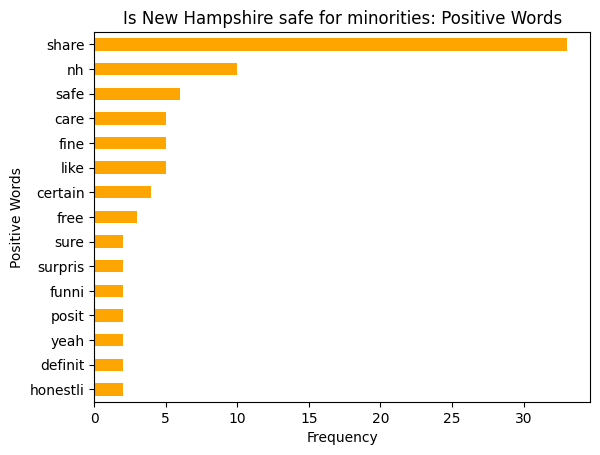

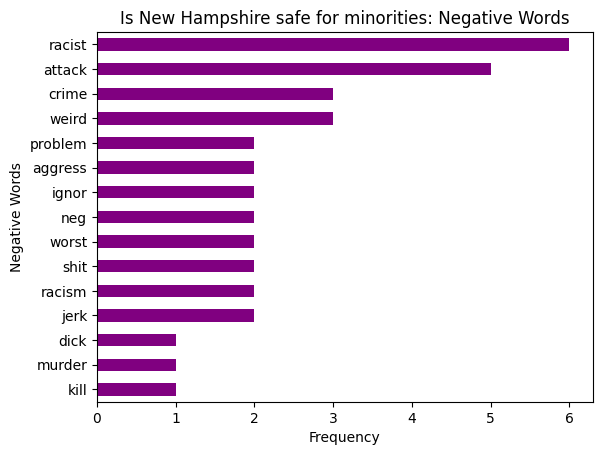

In [27]:
#website - url - https://www.reddit.com/r/newhampshire/comments/wafenm/is_new_hampshire_safe_for_minorities/

with open('nh_reddit.txt', 'r') as file:
    nh_reddit_content = file.read()
nh_reddit_content = nh_reddit_content.lower()

sia = vader.SentimentIntensityAnalyzer()
nh_reddit_word_token = word_tokenize(nh_reddit_content)

myStopWords = stopwords.words('english')
#get rid of stopwords
nh_reddit_content_nostop = [w for w in nh_reddit_word_token if w not in myStopWords]
#get rid of numbers
nh_reddit_cleaned = [w for w in nh_reddit_content_nostop if not w.isdigit()]

pos_word_list = []
neg_word_list = []

for word in nh_reddit_cleaned:
    score = sia.polarity_scores(word)
    if score['compound'] > 0:
        pos_word_list.append(word)
    elif score['compound'] < 0:
        neg_word_list.append(word)
        
stemmed_positive_words = [PorterStemmer().stem(w) for w in pos_word_list]
most_positive_words = nltk.FreqDist(stemmed_positive_words).most_common(15)
most_positive_words.reverse() #so its similiar to the graphs shown


stemmed_negative_words = [PorterStemmer().stem(w) for w in neg_word_list]
most_negative_words = nltk.FreqDist(stemmed_negative_words).most_common(15)
most_negative_words.reverse()

# Positive: horizontal bar plot
df = pd.DataFrame(most_positive_words, columns=['Positive Words', 'Frequency'])
color = 'orange'
df.plot(x='Positive Words', y='Frequency', kind='barh', legend=False, color=color)
plt.title('Positive Words')
plt.xlabel('Frequency')
plt.ylabel('Positive Words')
plt.title('Is New Hampshire safe for minorities: Positive Words')
plt.show()


# Negative: horizontal bar plot
df_1 = pd.DataFrame(most_negative_words, columns=['Negative Words', 'Frequency'])
color_1 = 'purple'
df_1.plot(x='Negative Words', y='Frequency', kind='barh', legend=False, color=color_1)
plt.title('Negative Words')
plt.xlabel('Frequency')
plt.ylabel('Negative Words')
plt.title('Is New Hampshire safe for minorities: Negative Words')
plt.show()

# Discussion of Results

Based on the graphs above, let's discuss our findings. First, lets summarize what we found to be general trend for states, in terms of property and violent crimes.  
    The analysis of property and violent crime trends across various U.S. states reveals distinctive patterns in both peak periods and general trends. Notably, Louisiana and Missouri experienced peak property and violent crime rates during the 1990s, reflecting a significant prevalence of criminal activities during that decade. Another group of states, including Arkansas, Kentucky, and several others, witnessed peak crime rates in the 1980s to 2000s, indicating prolonged periods of heightened criminal activities. In contrast, states like Nevada, South Carolina, Georgia, and Michigan exhibited relatively stable or fluctuating crime rates, suggesting varying degrees of control over criminal incidents. Additionally, states such as Arizona, Utah, North Dakota, and Alabama displayed unique peak periods for either property or violent crimes. When considering general trends, a substantial number of states demonstrated a consistent decrease in both property and violent crime rates over the years, which shows successful efforts in crime prevention and law enforcement. Conversely, states like Arkansas (in terms of violent crimes) and Tennessee experienced an overall increase in violent crime rates, demonstrating ongoing challenges in maintaining public safety.  
    Next, according to our analysis and historical data, by assigning more weight/importance to violent crime (0.7) as opposed to property crimes (0.3), as human lives matter much more than any property, we found out that the safest state is the state of New Hampshire, whereas on the other hand, according to our method of analysis, historically speaking, the most dangerous state is District of Columbia.  
    By conducting further analysis, we found that the total property crime rate will be slightly decreasing in New Hampshire in year 2050, and the total violent rate will stay the same. In constrast, for District of Columbia, luckily our predictions show that both rates will be decreasing slightly and then stabilizing. With this in mind, it is important to note that these results were obtained using our choice of statistical method and variables, however, results may vary depending on the algorithm chosen. One can refer to the Mean Squared Error to draw their own conclusions about the accuracy of the model.  
    Next step of our analysis was diving into public forums to understand what people say about these states. The query googled to find the forums where the same - "safety in {state_name} reddit" and one of the results for each state was chosen. By conducting sentiment analsysis for the forum named "Crime in DC", we see words like "violent, victim, assault, problem" to be prevelant. This suggests that people have discussed this issues and due to the existence of the words like "violent, assault, problem, victim, scary", we can draw conclusion that there is an actual safety problem in DC as these words are specific, meaning that people most likely discussed crime cases, talking about victim, people who were assaulted and that crime is a problem in DC. Looking at the positive words, we see "safe, like, safer, better, thank", which suggests that DC might be getting safer and better. In contrast, if we examine the forum "Is New Hampshire safe for minorities", we see positive words like "safe, care, free, positive, funny, sure" which suggests that people generally refer that it is a safe state for minorities. Looking at the negative words, we see words like "racist, crime, attack, murder, problem", which may suggests that people are discussing the issues of racism, discussing about prevalence of crime and more. However, we can see that the frequency of positive words considerably exceeds the frequency of negative words, which suggests that overall, people have a good opinion about safety of minorities in New Hampshire.  
    Although, the choice of forums might be considered to be bias, it is important to note that with data science projects that involve humanstic content, such as cultural, social or other type of data, the completness of data and potential bias become crucial considerations. With that in mind, the choice of forums supports the findings in this particular analysis and by no means suggests that other results may not be obtained.

